# **Business scenario and problem:**
The HR department at Salifort Motors wants to take some initiatives to improve the employees satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They have the following question: what’s likely to make the employee leave the company?

my goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

BY predicting if an employees is likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

# **Data Dictionary**:

 - **satisfaction_level**: Reflects the level of satisfaction reported by employees, offering insights into their overall contentment within the organization.

 - **last_evaluation**: Indicates the most recent performance evaluation score of employees, providing a glimpse into their professional progress.
 
 - **number_project**: Represents the number of projects assigned to employees, shedding light on their workload and level of engagement.

 - **average_monthly_hours**: Displays the average number of hours worked per month by employees, offering perspective on their dedication and work ethic.
 
 - **time_spend_company**: Illustrates the duration of employment for each individual, indicating potential correlations between tenure and turnover.

 - **Work_accident**: Binary indicator denoting whether an employee has been involved in a work-related accident, highlighting workplace safety concerns.

 - **left**: Binary target variable indicating whether an employee has left the company, serving as the focal point for predictive modeling efforts.

 - **promotion_last_5years**: Binary indicator signaling whether an employee has received a promotion within the last five years, influencing career advancement opportunities.

 - **Department**: Categorizes employees based on their department within the organization, offering insights into departmental dynamics.

 - **salary**: Classifies employees into salary brackets, providing insight into compensation levels and potential impact on retention.

In [1]:
#!pip install plotly

# Import libraries

In [77]:

# Data structure & manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

# Preprocessing
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler,
                                   MinMaxScaler)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Resample
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Model Selection
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Tree
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
import graphviz

# Metrics
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            confusion_matrix,
                            precision_score,
                            recall_score,
                            f1_score,
                            roc_curve,roc_auc_score)

# Warnings
import warnings
from sklearn.exceptions import ConvergenceWarning

In [78]:
# Set plot dpi, transparent background
plt.rcParams.update({'figure.figsize':(5,3),'figure.dpi': 150,'figure.facecolor':'None'})

# Set display option
pd.set_option('display.float_format', '{:.2f}'.format)

# Ignoring warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# **Data preparation**

In [4]:
# load dataset
df = pd.read_csv('HR_Sailfort_dataset.csv')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [5]:
df.shape

(14999, 10)

In [6]:
# check consistency of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.rename(columns={'Work_accident':'work_accident', 'time_spend_company':'tenure','Department':'department','average_montly_hours':'average_monthly_hours'}, inplace=True)
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

In [8]:
# check data distribution
df.describe(include='all')


satisfaction_level  last_evaluation  number_project  \
count             14999.00         14999.00        14999.00   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean                  0.61             0.72            3.80   
std                   0.25             0.17            1.23   
min                   0.09             0.36            2.00   
25%                   0.44             0.56            3.00   
50%                   0.64             0.72            4.00   
75%                   0.82             0.87            5.00   
max                   1.00             1.00            7.00   

        average_monthly_hours   tenure  work_accident     left  \
count                14999.00 14999.00       14999.00 14999.00   
unique                    NaN      NaN            NaN      NaN   
top                       NaN      NaN            NaN      NaN   
freq                      NaN      NaN            NaN      NaN   
mean                   201.05     3.50           0.14     0.24   
std                     49.94     1.46           0.35     0.43   
min                     96.00     2.00           0.00     0.00   
25%                    156.00     3.00           0.00     0.00   
50%                    200.00     3.00           0.00     0.00   
75%                    245.00     4.00           0.00     0.00   
max                    310.00    10.00           1.00     1.00   

        promotion_last_5years department salary  
count                14999.00      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                     0.02        NaN    NaN  
std                      0.14        NaN    NaN  
min                      0.00        NaN    NaN  
25%                      0.00        NaN    NaN  
50%                      0.00        NaN    NaN  
75%                      0.00        NaN    NaN  
max                      1.00        NaN    NaN

In [9]:
# check missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [11]:
# Define target column, category columns, numeric columns
target_col = ['left']
cat_cols = ['work_accident','promotion_last_5years','department','salary']
num_cols = [cols for cols in df.columns if cols not in cat_cols + ['left']]

In [12]:
# check unvalid values in categorical columns
for i in cat_cols:
    print(f'{i}: {df[i].unique()}, \n')

work_accident: [0 1], 

promotion_last_5years: [0 1], 

department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'], 

salary: ['low' 'medium' 'high'], 



In [13]:
# check columns with single value
def get_cols_with_single_value(df):
  # single value
  single_value_cols = []
  for col in df.columns:
      if df[col].nunique() == 1:
          single_value_cols.append(col)
  return single_value_cols

In [14]:
get_cols_with_single_value(df)

[]

In [15]:
# check duplicates: 20% row are duplicated
df.duplicated().sum()

3008

In [16]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(11991, 10)

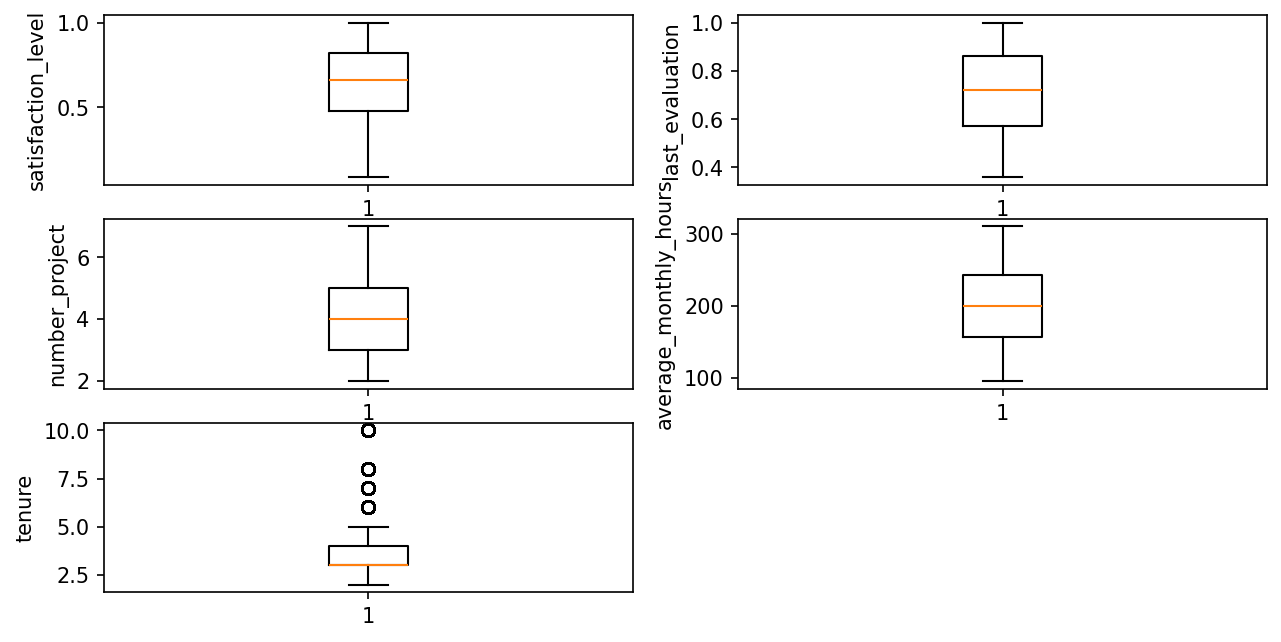

In [17]:
# check outliers in numerical columns
plt.figure(figsize=(10,1*len(num_cols)))

for i,col in enumerate(num_cols):
    plt.subplot(round((len(num_cols)+1)/2),2,i+1)
    plt.boxplot(df[col])
    plt.ylabel(col)

plt.show()


In [18]:
# Check outliers
def check_outliers(df):
    for i in num_cols:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        #Identify outliers
        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)][i]
        outlier_values = df[(df[i] < lower_bound) | (df[i] > upper_bound)][i].unique()
        percentage = (df[(df[i] < lower_bound) | (df[i] > upper_bound)][i].count() / len(df[i]))*100
        if len(outliers) == 0:
            continue
        else:
            print(i)
            print(f'lower bound is: {lower_bound}\nupper bound is: {upper_bound}')
            print("Number of rows in the data containing outliers:", len(outliers))
            print(f'Percentage of outliers: {percentage:.2f}%')
            print(f'Outliers: {sorted(outlier_values)} \n')

In [19]:
check_outliers(df)

tenure
lower bound is: 1.5
upper bound is: 5.5
Number of rows in the data containing outliers: 824
Percentage of outliers: 6.87%
Outliers: [6, 7, 8, 10] 



In [20]:
# Các outliers có ý nghĩa
# Xử lý outliers để tránh ảnh hưởng đến mô hình ML: loại bỏ, biến đổi, thay thể bằng giá trị gần nhất (imputation)
df['tenure'].replace({(6,7,8,10):5.5}, inplace = True)

# EDA

## Univariate Analysis

### Target column:
- Left: 16.6%
- Considering oversampling later to address the imbalance.

Text(0.5, -0.1, 'left')

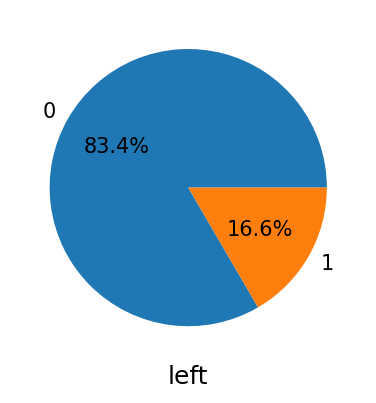

In [21]:
plt.pie(df['left'].value_counts().sort_index(), labels=sorted(df['left'].unique()),autopct='%.1f%%')
plt.title('left', y = -0.1)

### Categorical cols:

- work accident: 15.4%
- promotion last 5 years: 2% --> **extremly low**
- Sales, technical. support --> more employees than the others
- Salaries are mainly Low & Medium

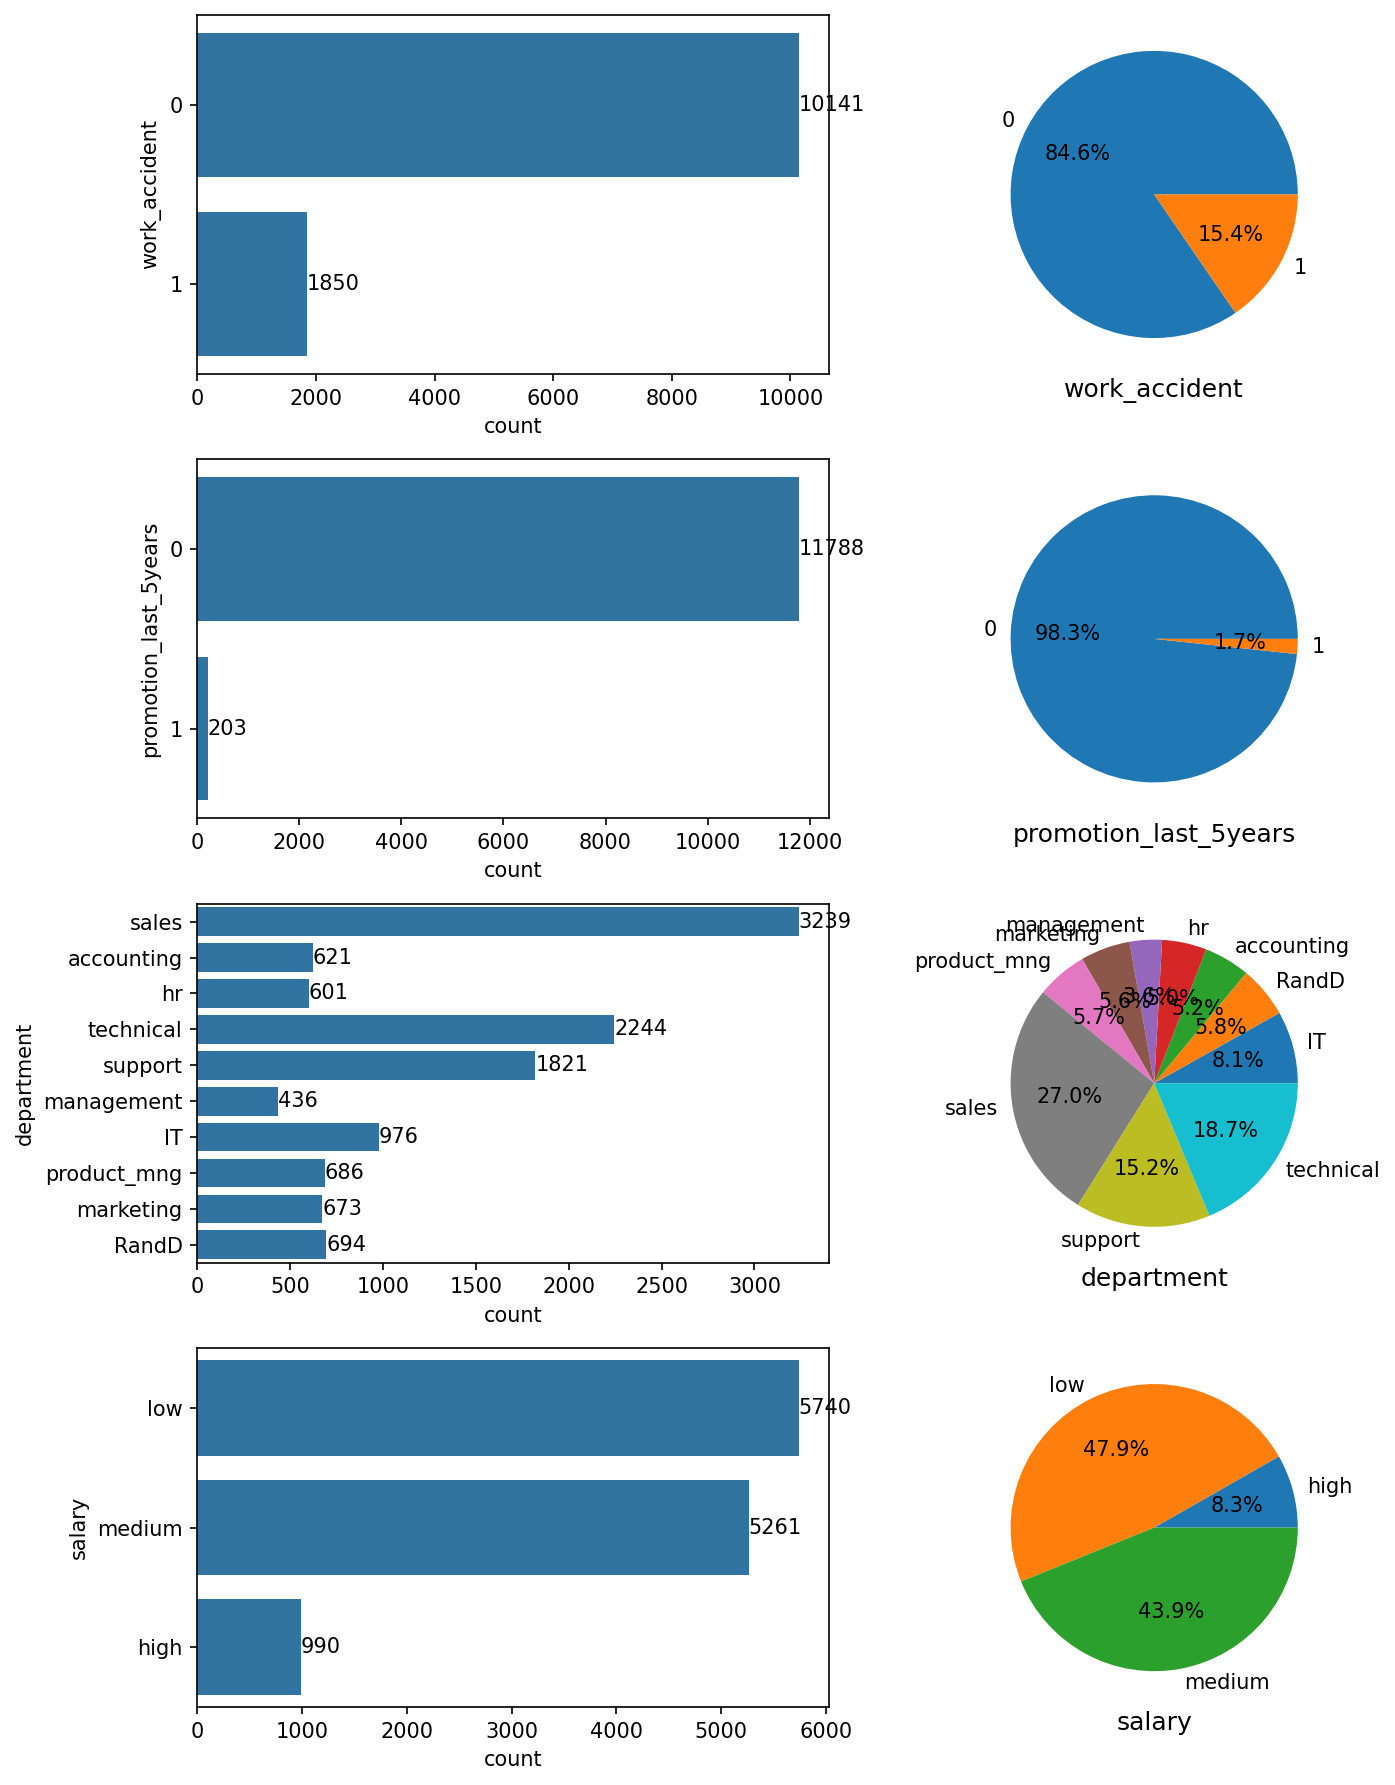

In [22]:
# Numerical columns
plt.figure(figsize=(10,3*len(cat_cols)))
for i, col in enumerate(cat_cols):
  plt.subplot(len(cat_cols), 2, i*2+1)
  ax = sns.countplot(y=col, data=df)
  ax.bar_label(ax.containers[0])
  

  plt.subplot(len(cat_cols), 2,i*2+2)
  plt.pie(df[col].value_counts().sort_index(), labels=sorted(df[col].unique()),autopct='%.1f%%')
  plt.title(col, y = -0.1)

plt.tight_layout()
plt.show()

In [23]:
df['promotion_last_5years'].value_counts(normalize=True)

promotion_last_5years
0   0.98
1   0.02
Name: proportion, dtype: float64

In [24]:
df[df['work_accident']==1].describe()

satisfaction_level  last_evaluation  number_project  \
count             1850.00          1850.00         1850.00   
mean                 0.65             0.71            3.79   
std                  0.23             0.17            1.05   
min                  0.09             0.36            2.00   
25%                  0.52             0.57            3.00   
50%                  0.67             0.72            4.00   
75%                  0.83             0.85            4.75   
max                  1.00             1.00            7.00   

       average_monthly_hours  tenure  work_accident    left  \
count                1850.00 1850.00        1850.00 1850.00   
mean                  199.01    3.24           1.00    0.06   
std                    46.94    1.09           0.00    0.23   
min                    96.00    2.00           1.00    0.00   
25%                   159.00    2.00           1.00    0.00   
50%                   198.00    3.00           1.00    0.00   
75%                   239.00    4.00           1.00    0.00   
max                   309.00    5.50           1.00    1.00   

       promotion_last_5years  
count                1850.00  
mean                    0.03  
std                     0.16  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     0.00  
max                     1.00

### Numerical cols:
- Satisfaction: 0.4 --> 1
- last evaluation: 0.6 --> 1, **above average**
- number project: 3, 4, 5
- average monthly hour: 150 --> 250
- tenure: 2, 3, 4. Median tenure = 3 --> **low**
    
    Median Tenure indicates the level of commitment and loyalty of employees to the company. It reflects a good work culture and environment, suggesting that employees are satisfied with their jobs and want to stay with the company long-term. If the Median Tenure is low, it may indicate a high employee turnover rate. This is a warning sign for the company to improve the working environment to enhance engagement and retain talent. Median Tenure is an important metric in assessing a company’s workforce. HR managers should monitor and analyze this metric to plan strategies for attracting, developing, and retaining talent for the company

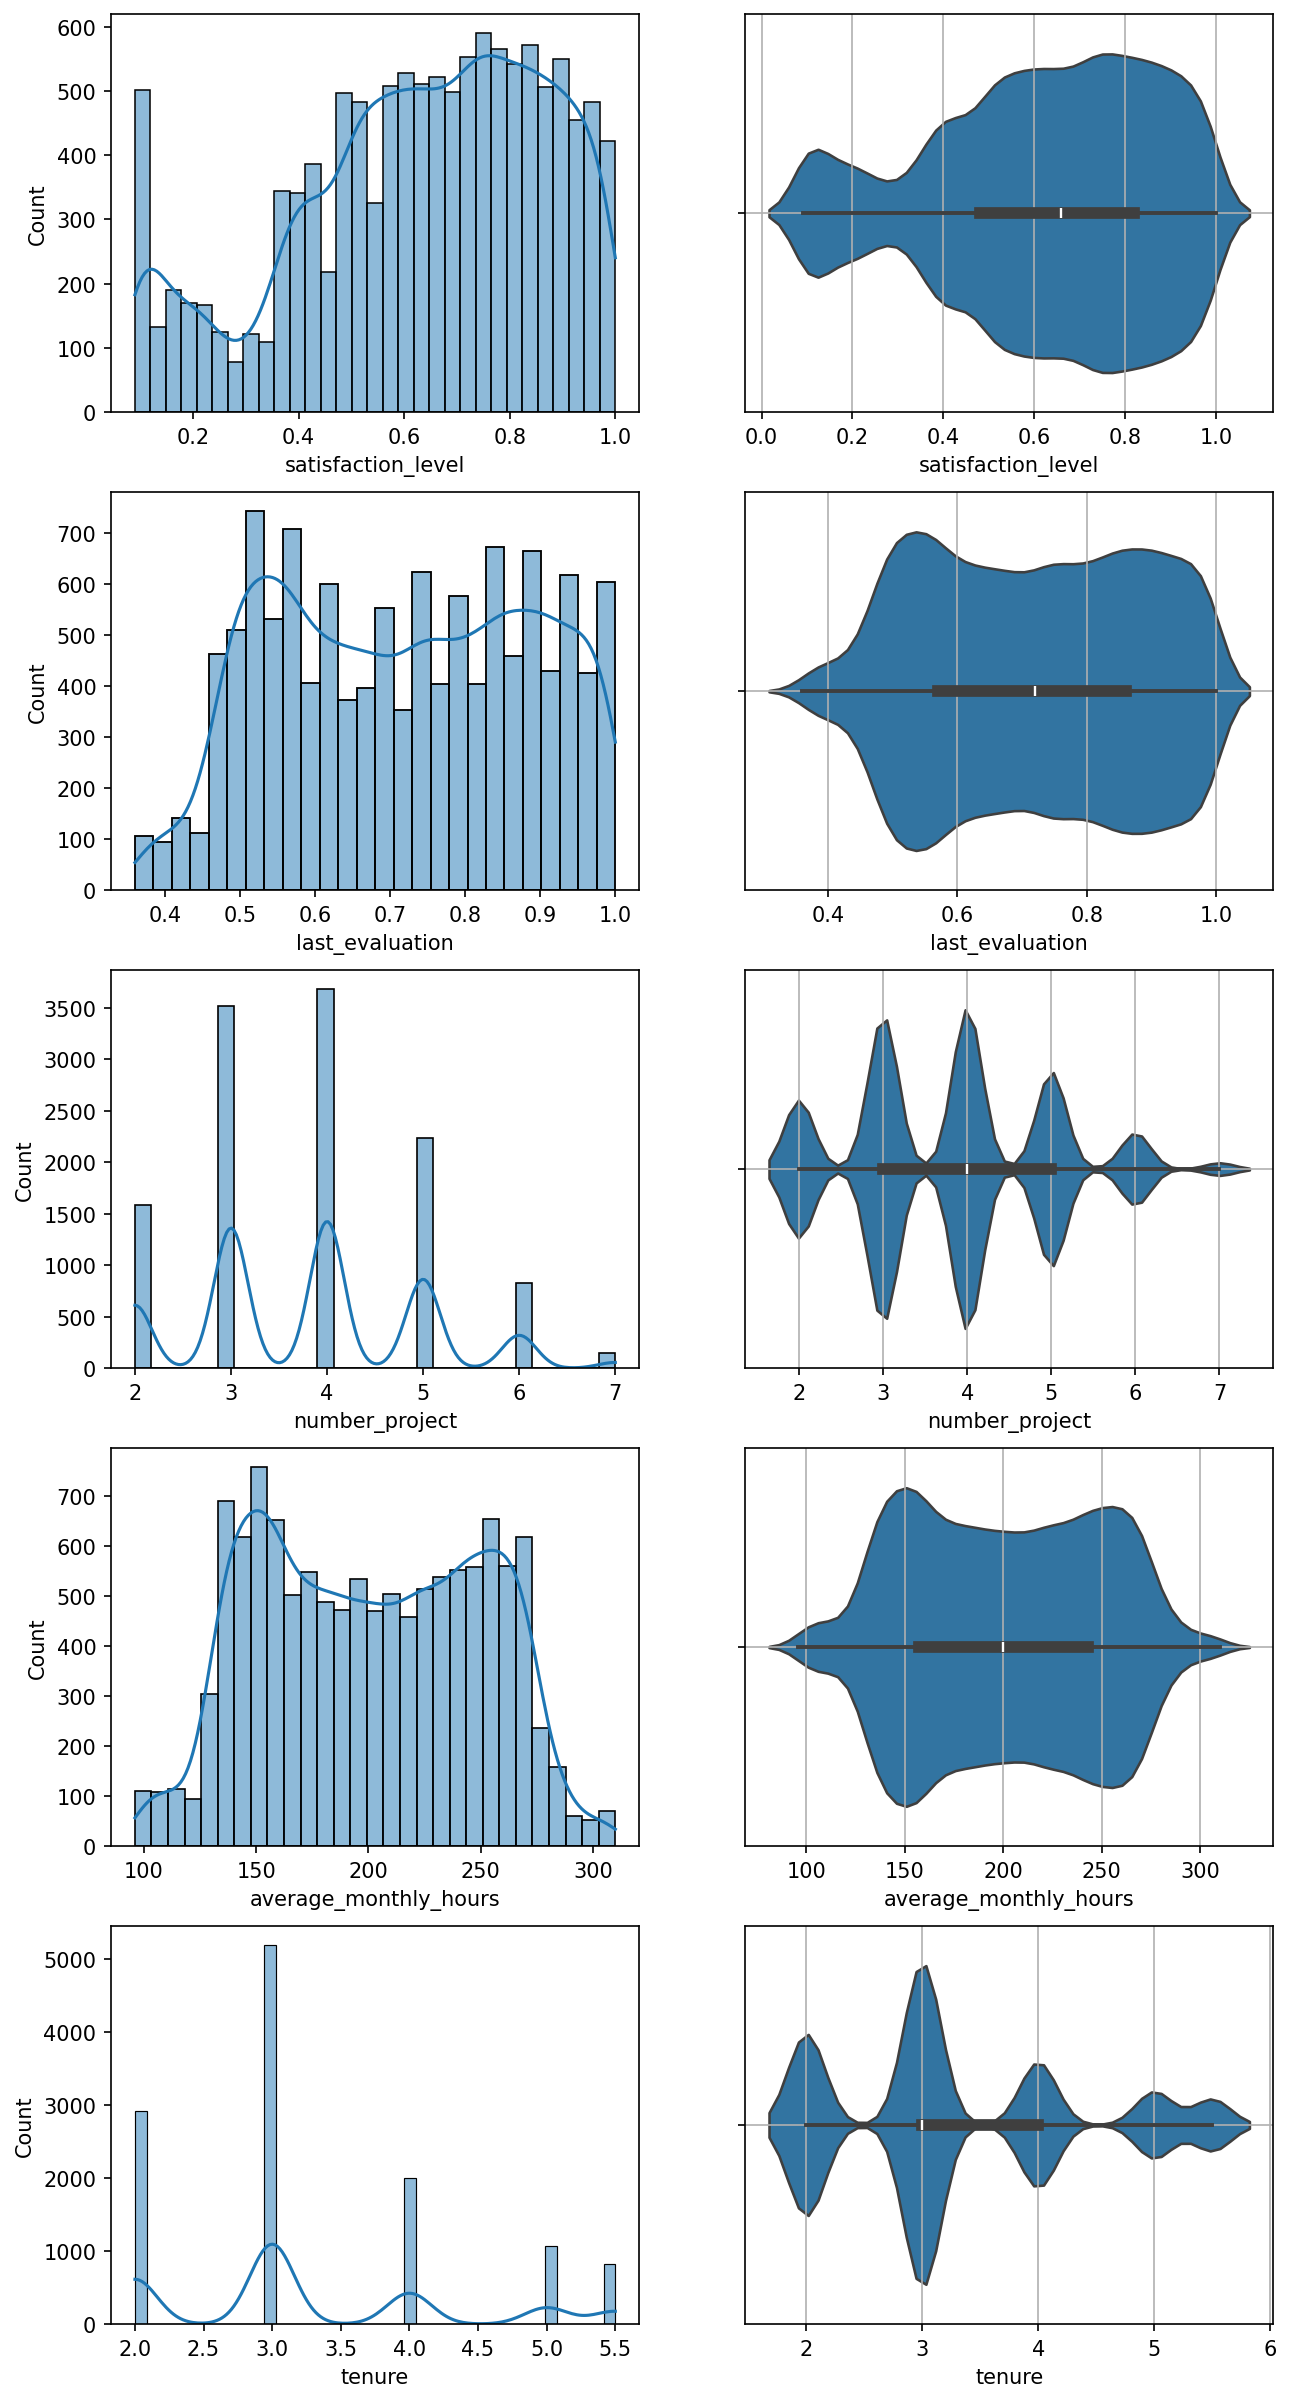

In [25]:
plt.figure(figsize=(10,len(num_cols)*4))
for i,col in enumerate(num_cols):
    plt.subplot(len(num_cols),2,i*2+1)
    sns.histplot(df,x = col,kde=True)
    plt.subplot(len(num_cols),2,i*2+2)
    sns.violinplot(data = df, x = col,gridsize=50)
    plt.grid()
plt.show()

In [26]:
# Binning the satisfaction levels into 5 levels
df['satisfaction_level_binned'] = pd.cut(df['satisfaction_level'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[0.2, 0.4, 0.6, 0.8, 1], include_lowest=True)

In [27]:
df['satisfaction_level_binned'].value_counts(normalize=True).reset_index().sort_values(by = 'satisfaction_level_binned')

satisfaction_level_binned  proportion
4                      0.20        0.08
3                      0.40        0.10
2                      0.60        0.24
0                      0.80        0.30
1                      1.00        0.28

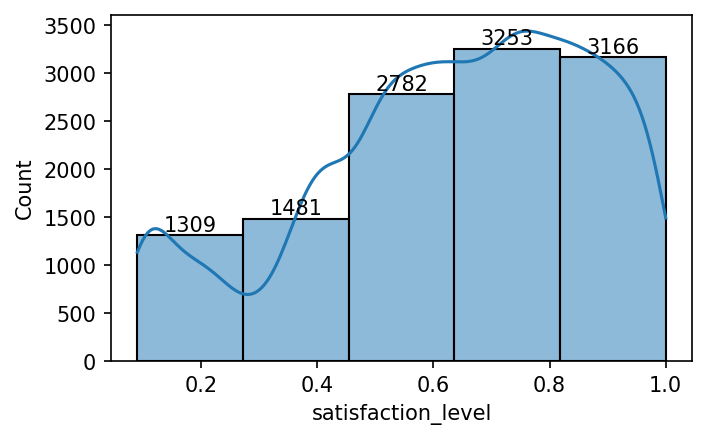

In [28]:
ax= sns.histplot(df,x = df['satisfaction_level'],kde=True,bins=5)
ax.bar_label(ax.containers[0])
plt.show()

In [29]:
df['last_evaluation'].unique().min(), df['last_evaluation'].unique().max()

(0.36, 1.0)

In [30]:
# Binning the last evaluation points into 5 levels
df['last_evaluation_binned'] = pd.cut(df['last_evaluation'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=[0.2, 0.4, 0.6, 0.8, 1], include_lowest=True)

In [31]:
df['last_evaluation_binned'].value_counts(normalize=True).reset_index().sort_values(by = 'last_evaluation_binned')

last_evaluation_binned  proportion
4                   0.20        0.00
3                   0.40        0.02
2                   0.60        0.30
1                   0.80        0.32
0                   1.00        0.36

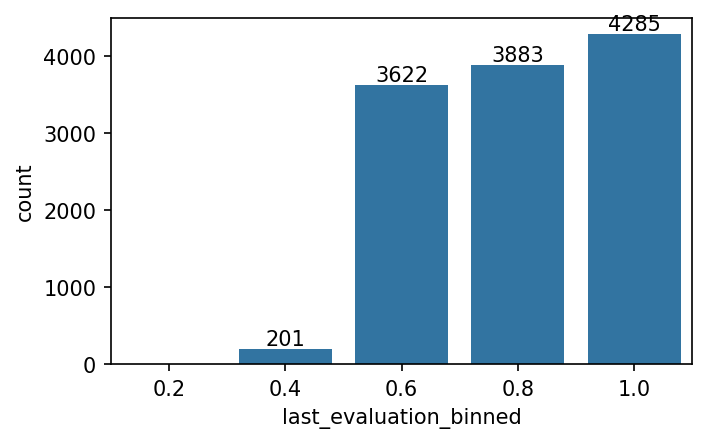

In [32]:
ax= sns.countplot(df,x = df['last_evaluation_binned'])
ax.bar_label(ax.containers[0])
plt.show()

## Bivariate Analysis

In [33]:
num_cols = [cols for cols in num_cols if cols not in ['satisfaction_level','last_evaluation']] + ['satisfaction_level_binned','last_evaluation_binned']

In [34]:
num_cols

['number_project',
 'average_monthly_hours',
 'tenure',
 'satisfaction_level_binned',
 'last_evaluation_binned']

<Axes: >

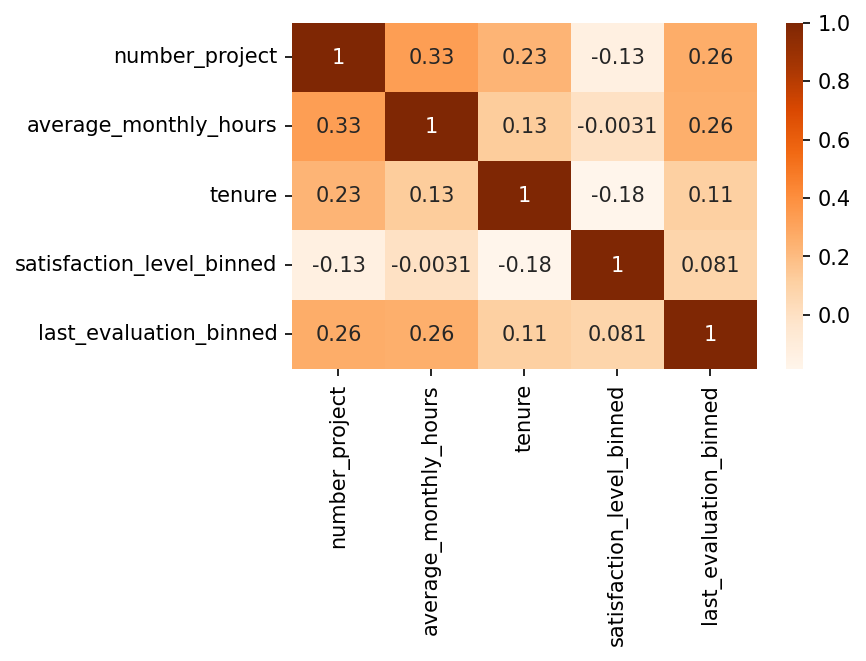

In [35]:
sns.heatmap(df[num_cols].corr(), cmap='Oranges', annot=True)

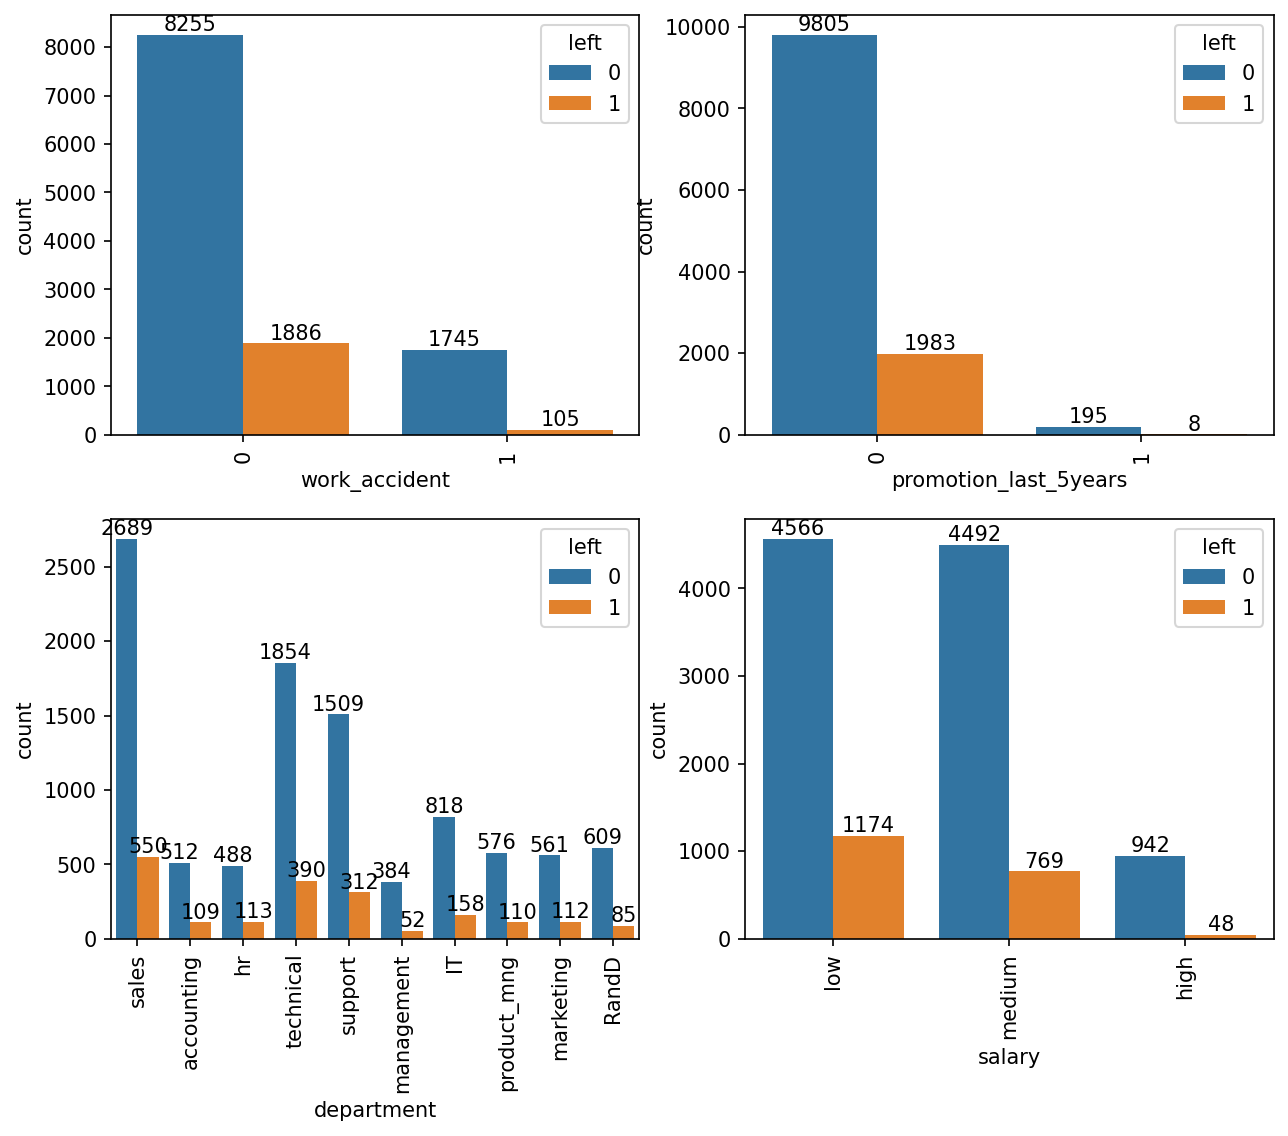

In [36]:

plt.figure(figsize=(10,2*len(cat_cols)))
for i, col in enumerate(cat_cols):
  plt.subplot(2,2, i+1)
  ax = sns.countplot(data = df, hue='left', x=col)
  plt.xticks(rotation=90)
  for container in ax.containers:
        ax.bar_label(container)
plt.show()

In [37]:
df[(df['promotion_last_5years']==0) & (df['left']==1)].describe()

satisfaction_level  last_evaluation  number_project  \
count             1983.00          1983.00         1983.00   
mean                 0.44             0.72            3.89   
std                  0.27             0.20            1.82   
min                  0.09             0.45            2.00   
25%                  0.11             0.52            2.00   
50%                  0.41             0.79            4.00   
75%                  0.73             0.91            6.00   
max                  0.92             1.00            7.00   

       average_monthly_hours  tenure  work_accident    left  \
count                1983.00 1983.00        1983.00 1983.00   
mean                  208.28    3.86           0.05    1.00   
std                    61.28    0.92           0.22    0.00   
min                   126.00    2.00           0.00    1.00   
25%                   146.00    3.00           0.00    1.00   
50%                   226.00    4.00           0.00    1.00   
75%                   263.00    5.00           0.00    1.00   
max                   310.00    5.50           1.00    1.00   

       promotion_last_5years  
count                1983.00  
mean                    0.00  
std                     0.00  
min                     0.00  
25%                     0.00  
50%                     0.00  
75%                     0.00  
max                     0.00

### Department vs Left:
- Accounting & support has highest retention rate > 75%

In [38]:
# Calculating percentage of retention of departments
percentage_left = (df[df['left'] == 1].groupby('department').size() / df.groupby('department').size() * 100).reset_index(name='left')

remaining = (df[df['left'] == 0].groupby('department').size() / df.groupby('department').size() * 100).reset_index(name='remaining')

left_no = (df[df['left'] == 1].groupby('department').size()).reset_index(name='left')

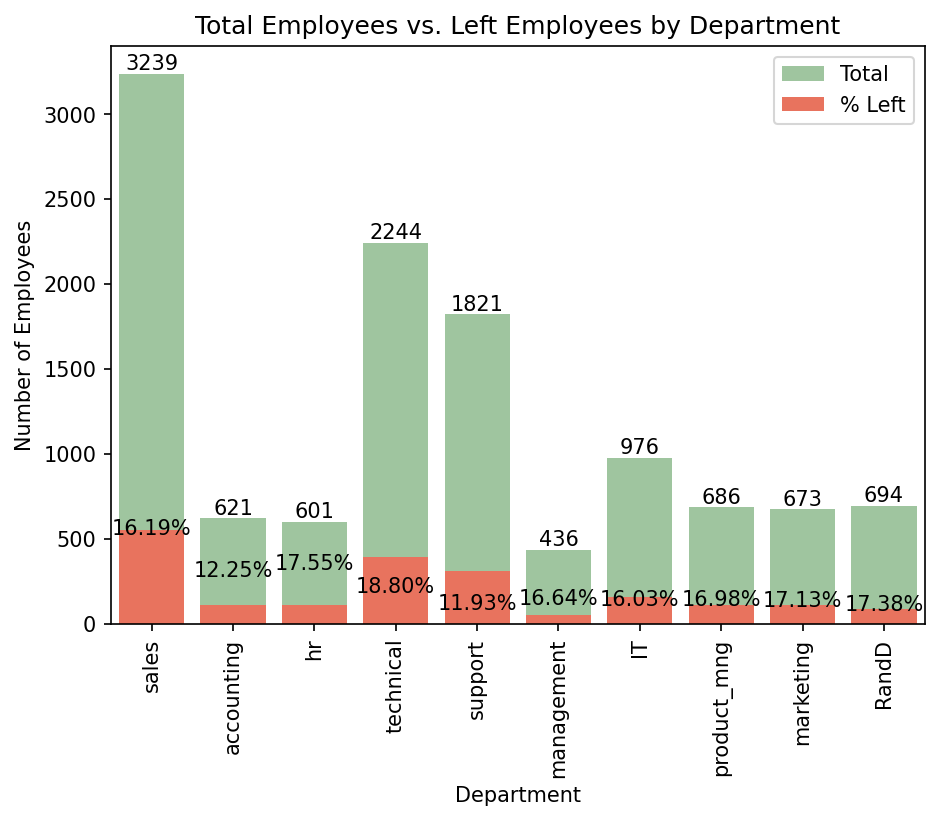

In [39]:
plt.figure(figsize=(7,5))
ax1 = sns.countplot(data =df, x ='department', color='green', alpha = 0.4, label='Total')
ax1.bar_label(ax1.containers[0]) 

ax2 = sns.barplot(data=left_no, x='department', y='left', color='tomato', label='% Left')
for index, row in percentage_left.iterrows():
    ax2.text(index, row['left'] / 100 * df['department'].value_counts()[index], f'{row["left"]:.2f}%', color='black', ha="center")

plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Total Employees vs. Left Employees by Department')
plt.legend()

plt.show()

### Salary vs Left:
- Low salary emps has high turnover rate (20%)

In [40]:
left = (df[df['left'] == 1].groupby('salary').size() / df.groupby('salary').size() * 100).reset_index(name='left_percent')
remaining = (df[df['left'] == 0].groupby('salary').size() / df.groupby('salary').size() * 100).reset_index(name='remaning_percent')
pd.concat([left,remaining['remaning_percent']], axis=1)

salary  left_percent  remaning_percent
0    high          4.85             95.15
1     low         20.45             79.55
2  medium         14.62             85.38

### Salary vs Department:
- Management has high salary than others.

In [41]:
px.parallel_categories(df[['department','salary']], color_continuous_scale=px.colors.sequential.Inferno)

In [42]:
# Function to calculate percentage for each salary type
def calculate_percentage(salary_type):
    return (df[df['salary'] == salary_type].groupby('department').size() / df.groupby('department').size() * 100).reset_index(name=f'{salary_type}_percent')

# Calculating the percentages
low_salary = calculate_percentage('low')
medium_salary = calculate_percentage('medium')
high_salary = calculate_percentage('high')

# Concatenating all datafranmes into one
pd.concat([low_salary, medium_salary['medium_percent'], high_salary['high_percent']], axis=1)

department  low_percent  medium_percent  high_percent
0           IT        48.77           43.95          7.27
1        RandD        46.40           46.83          6.77
2   accounting        47.67           42.19         10.14
3           hr        49.25           44.43          6.32
4   management        31.88           38.76         29.36
5    marketing        46.06           44.73          9.21
6  product_mng        50.00           42.42          7.58
7        sales        47.95           44.74          7.32
8      support        47.61           45.47          6.92
9    technical        50.71           41.89          7.40

### Satisfaction, Tenure vs Left:
- **Satisfaction: left emps are less satisfied compared to the remaining ones**
- Project:
    left: 2,4,5,6,7 
    remaining: 3, 4, 5
- Average hour monthly: left: 150, 250
- **Tenure: left: after 3 years**

In [43]:
df[df['left']==1]['tenure'].max()

5.5

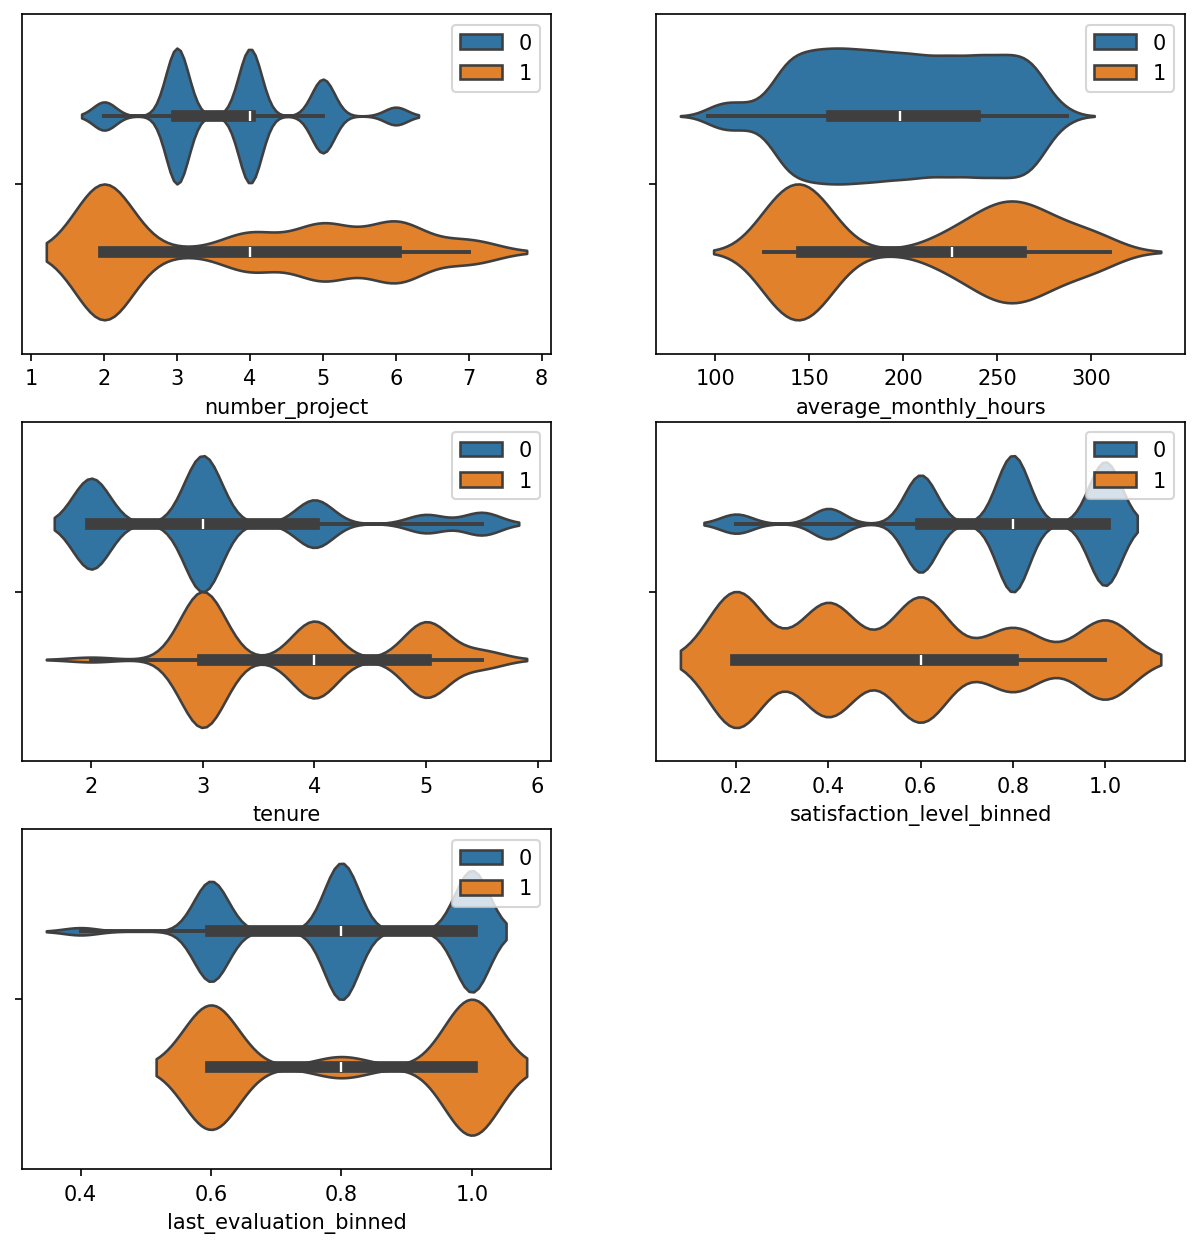

In [44]:
plt.figure(figsize=(10,2*len(num_cols)))
for i, col in enumerate(num_cols):
  plt.subplot(int((len(num_cols)+1)/2), 2, i+1)
  sns.violinplot(data = df, x=col, hue = 'left')
  plt.legend(loc='upper right')
  # sns.kdeplot(data = df, x=col, hue = 'left', multiple='stack')
plt.show()

In [45]:
df[df['left']==1]['number_project'].value_counts(normalize=True).reset_index(name = 'left').sort_values(by='number_project')

number_project  left
0               2  0.43
5               3  0.02
3               4  0.12
2               5  0.17
1               6  0.19
4               7  0.07

In [46]:
df[df['left']==0]['number_project'].value_counts(normalize=True).reset_index(name = 'remaining').sort_values(by='number_project')

number_project  remaining
3               2       0.07
0               3       0.35
1               4       0.34
2               5       0.19
4               6       0.05

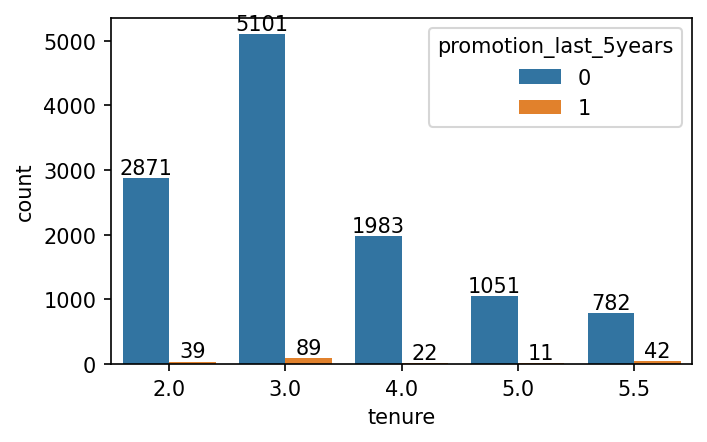

In [47]:
ax= sns.countplot(data = df, x= 'tenure', hue = 'promotion_last_5years')
for container in ax.containers:
    ax.bar_label(container)

In [48]:
df_left = df[df['left']==1]
df_remaining = df[df['left']==0]

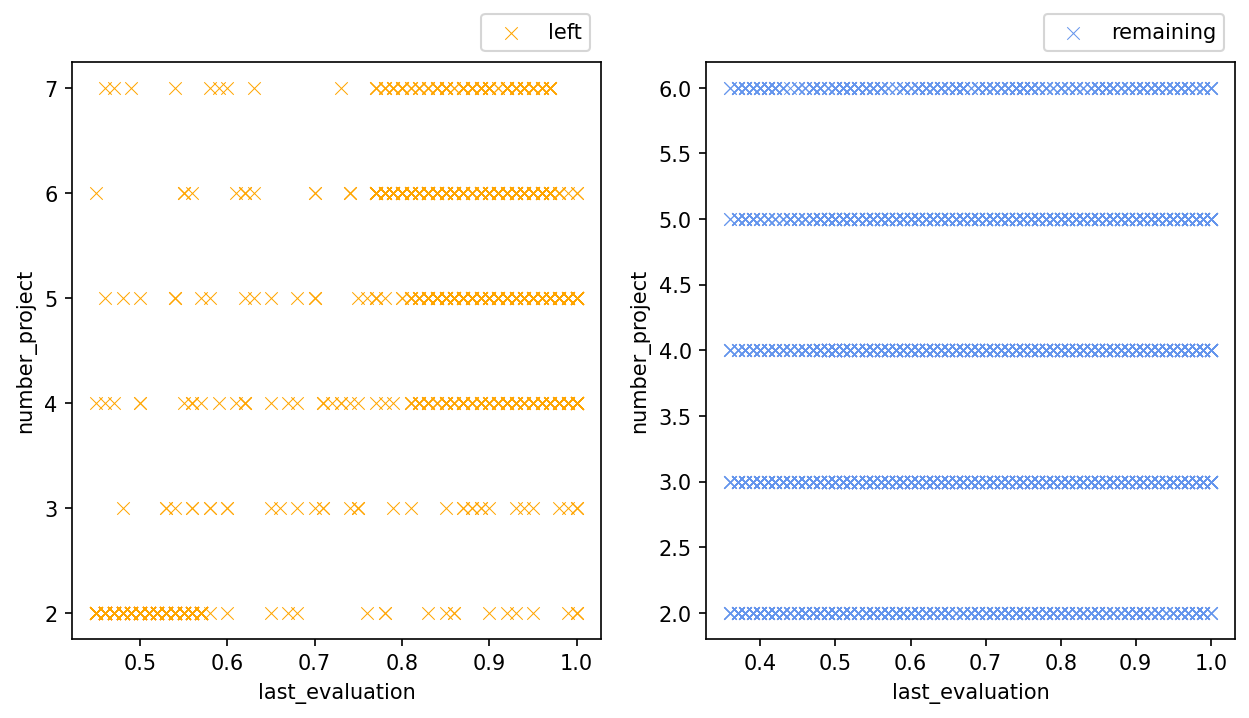

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df_left['last_evaluation'], y=df_left['number_project'], marker='x', label = 'left', color='orange')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

plt.subplot(1,2,2)
sns.scatterplot(x=df_remaining['last_evaluation'], y=df_remaining['number_project'], marker='x', label = 'remaining', color='cornflowerblue')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

### Avg monthly hours vs Last evaluation score
For left employees, there are 2 groups:
    
    A: those who worked considerably less than their peers had low evaluation score.
    
    B: those who worked more than 200 hours had high score

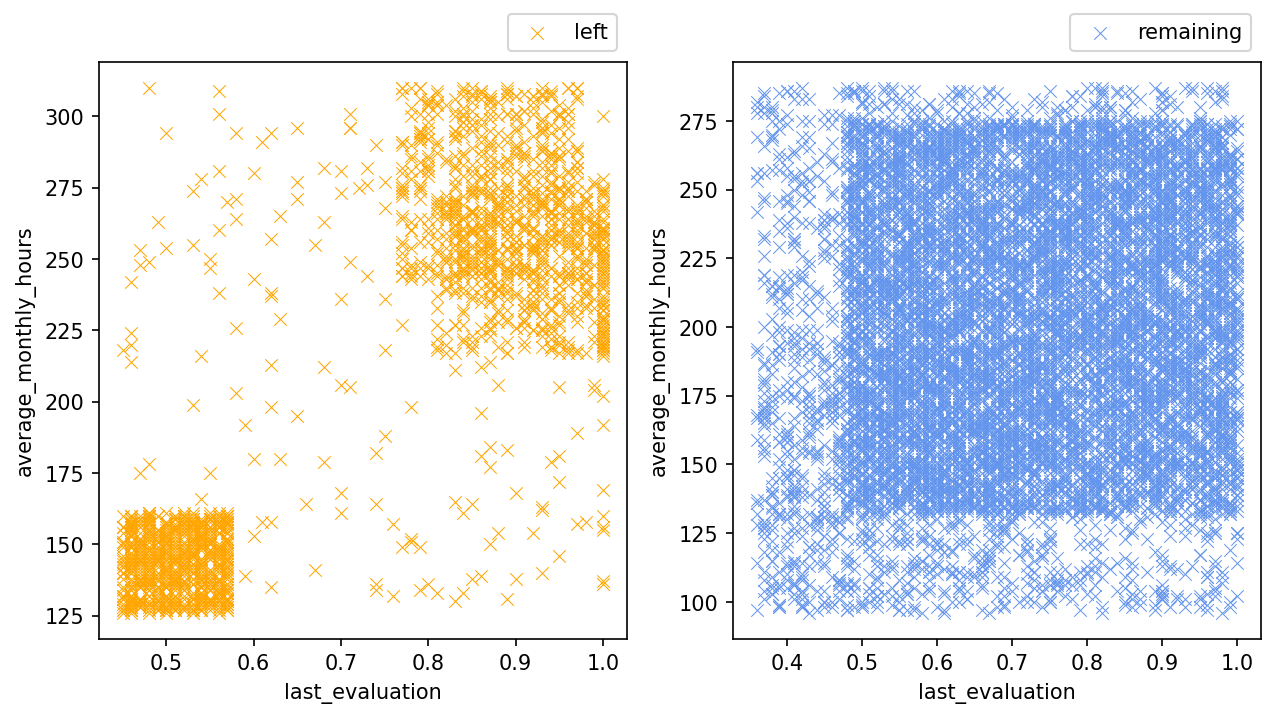

In [50]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df_left['last_evaluation'], y=df_left['average_monthly_hours'], marker='x', label = 'left', color='orange')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

plt.subplot(1,2,2)
sns.scatterplot(x=df_remaining['last_evaluation'], y=df_remaining['average_monthly_hours'], marker='x', label = 'remaining', color='cornflowerblue')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

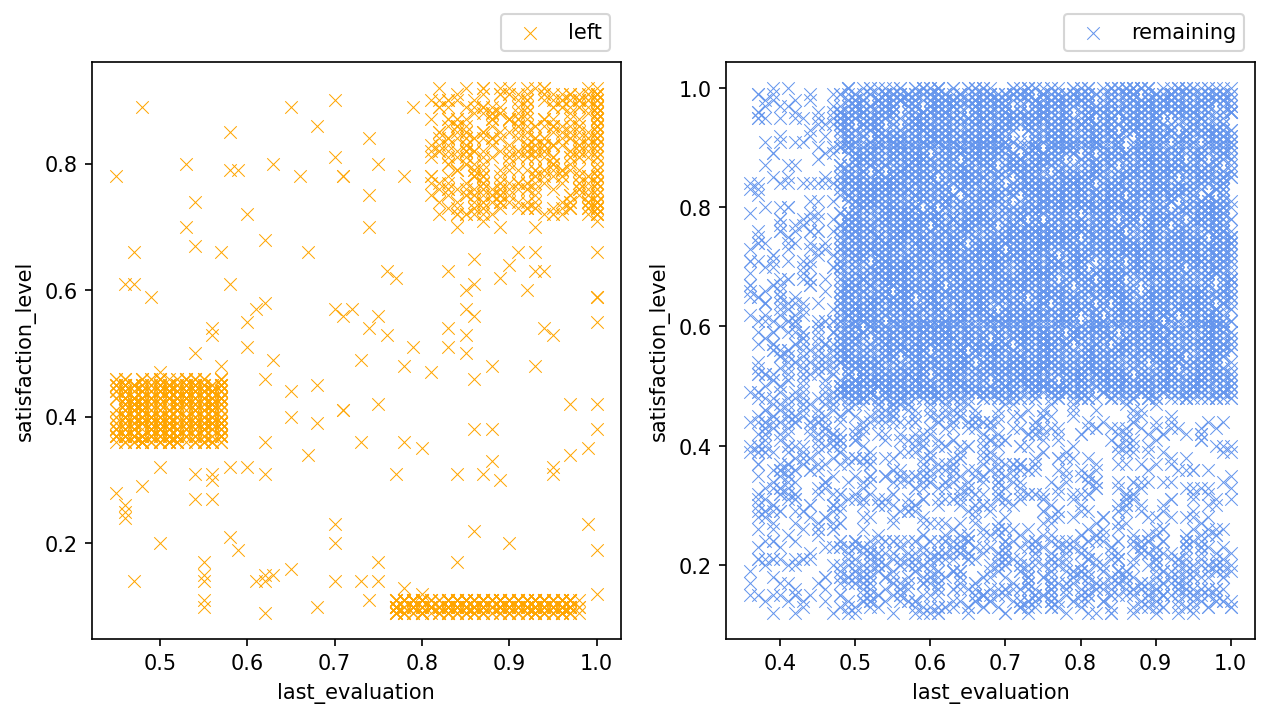

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df_left['last_evaluation'], y=df_left['satisfaction_level'], marker='x', label = 'left', color='orange')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

plt.subplot(1,2,2)
sns.scatterplot(x=df_remaining['last_evaluation'], y=df_remaining['satisfaction_level'], marker='x', label = 'remaining', color='cornflowerblue')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

### Avg monthly hours vs no. of projects
- 2 group of left employees:
    
    A: those who worked considerably less than their peers with the same no. of projects.
    
    B: those who contributed a lot to their project they worked in

 - Everyone with 7 projects left the company.
 - The optimal no. of projects seems to be 3,4. the ratio of left is smaller than others.
 - Employees here are overworked.
    No. of hours per month: 8h x 5d x 4w = 160h/month
    The average hours for employees who worked with 3, 4, 5, 6 projects is about 200h

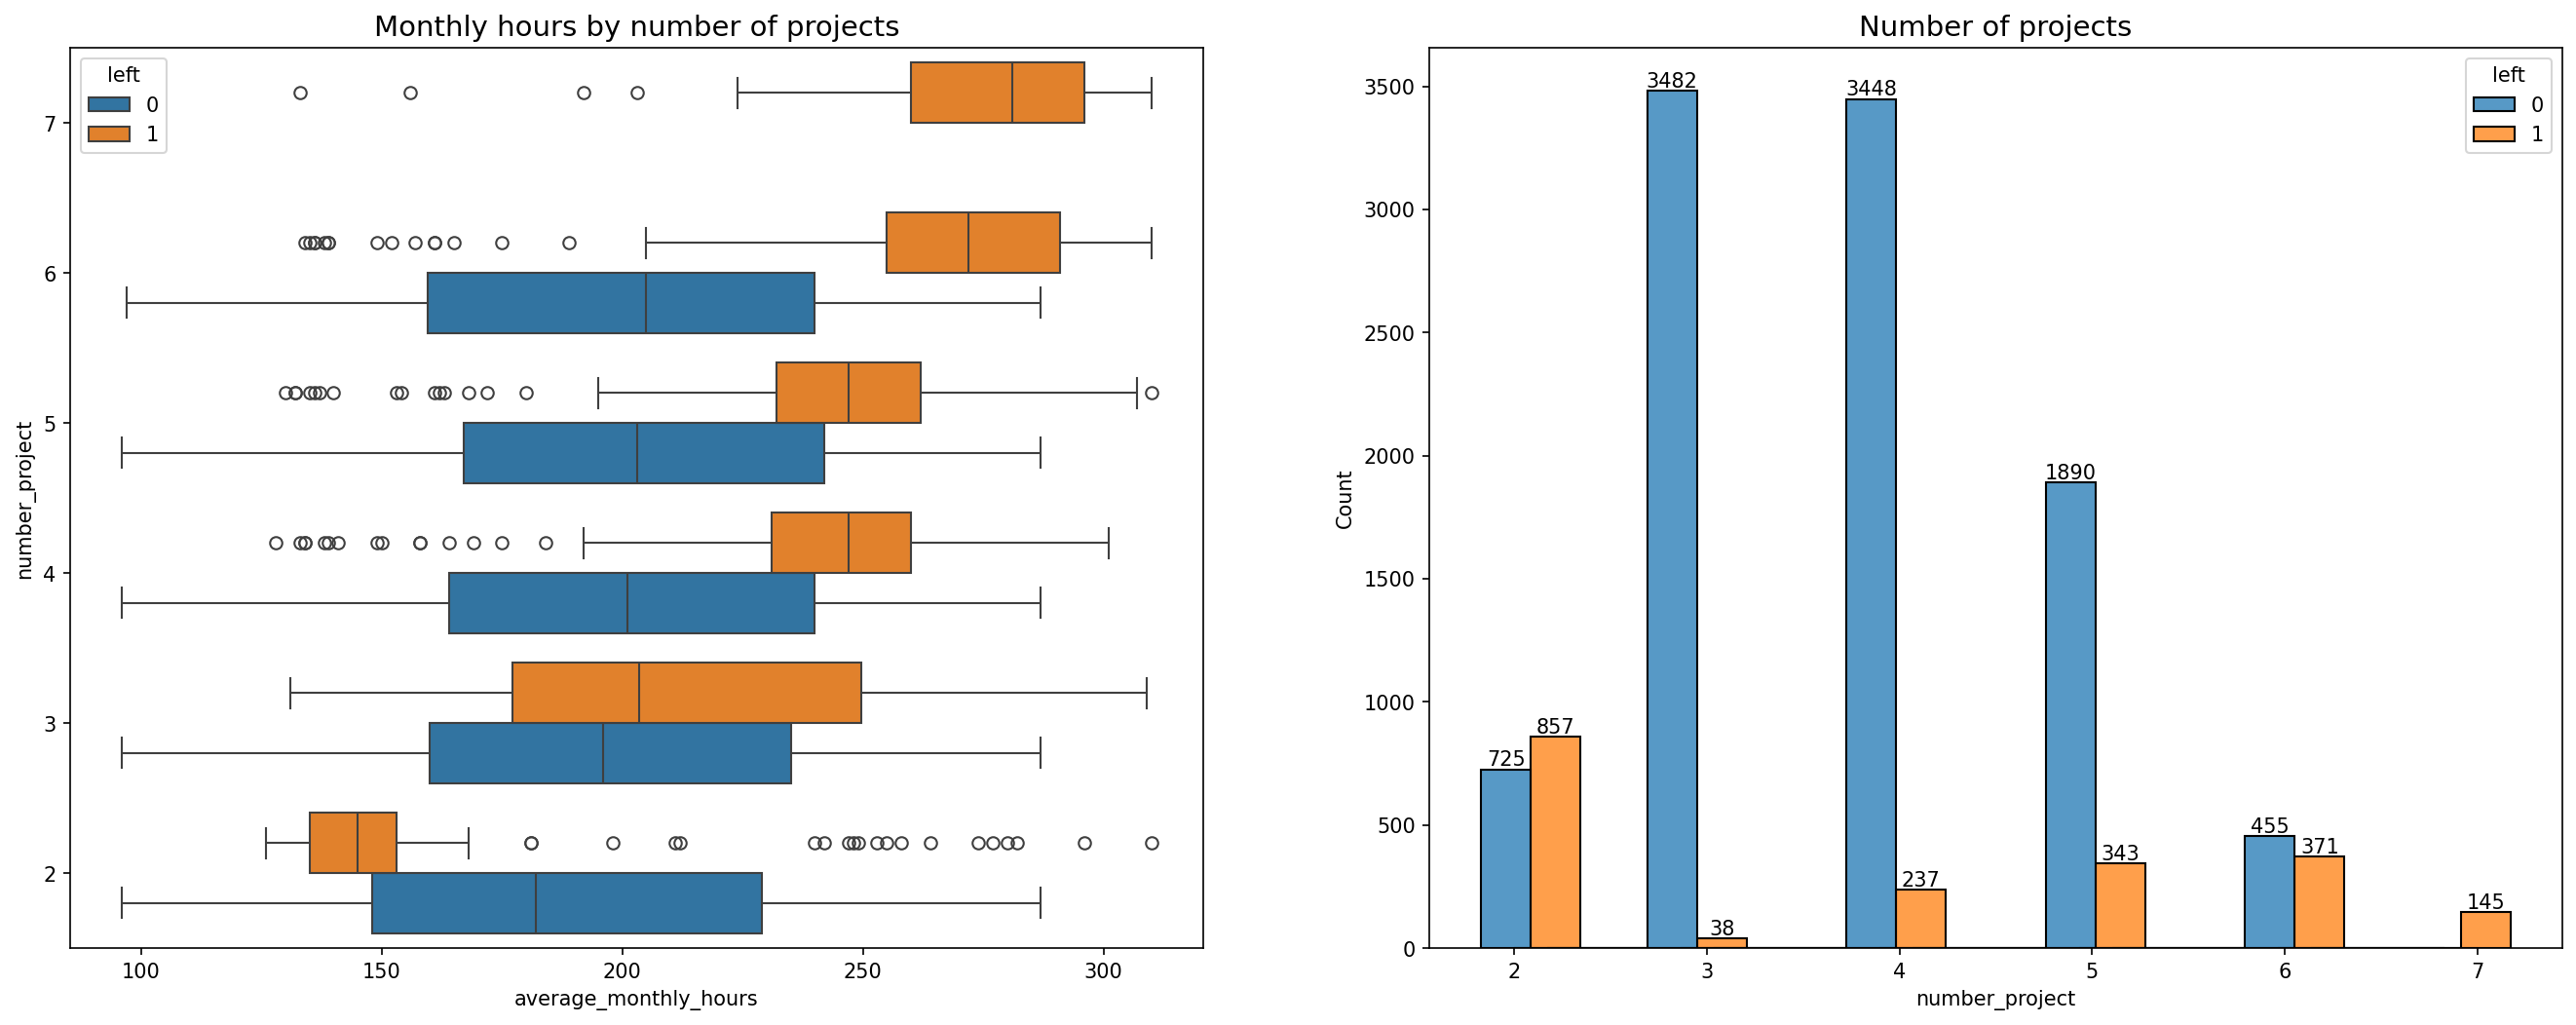

In [52]:
plt.figure(figsize=(22,8))

ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left',orient='h')
ax1.invert_yaxis()
plt.title('Monthly hours by number of projects', fontsize='14')

ax2 = plt.subplot(1,2,2)
ax2 = sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=3)
for container in ax2.containers:
    labels = [f'{int(value)}' if value != 0 else '' for value in container.datavalues]
    ax2.bar_label(container, labels=labels)
plt.title('Number of projects', fontsize='14')

plt.show()

### Avg monthly hours vd Satisfaction level
- Group of left people who worked around 150 hours, had fewer projects than others and low satisfaction. Need to figure out the reason. They might have felt pressured, got troubles or any other reasons?

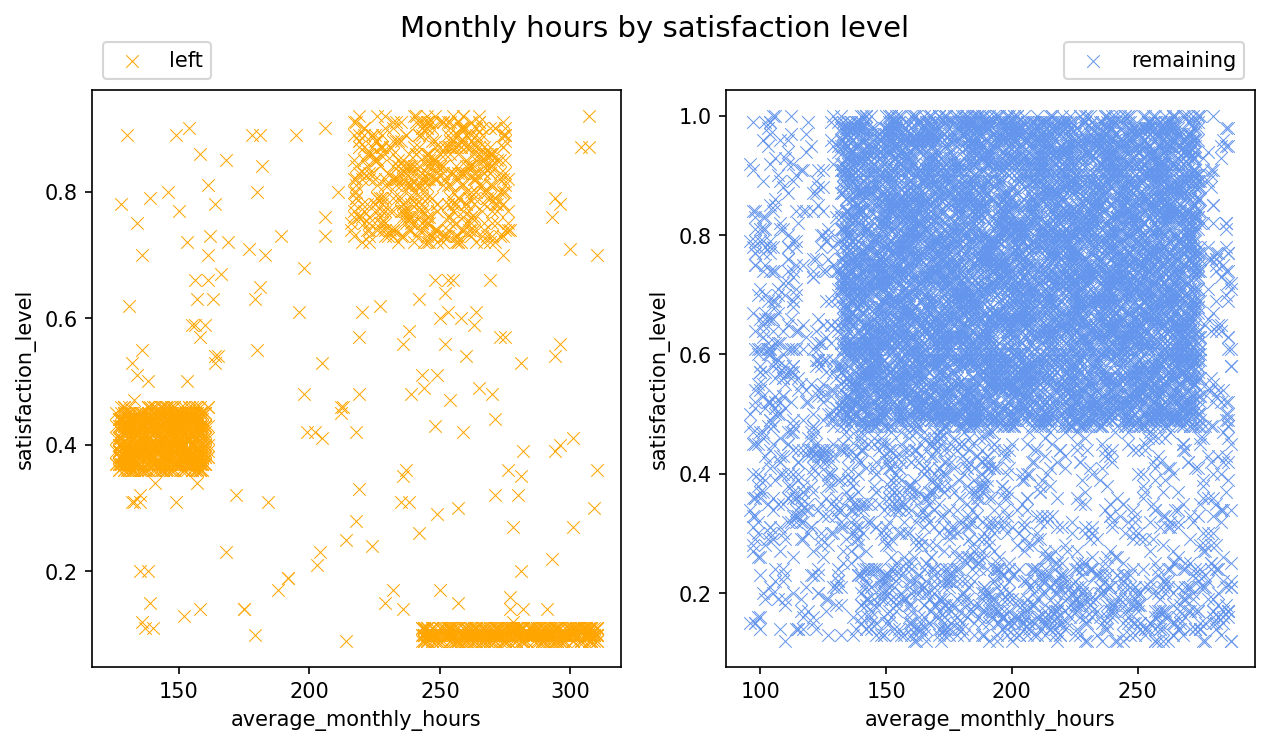

In [53]:
plt.figure(figsize=(10,5))
plt.suptitle('Monthly hours by satisfaction level', fontsize='14')

plt.subplot(1,2,1)
sns.scatterplot(x=df_left['average_monthly_hours'], y=df_left['satisfaction_level'], marker='x', label = 'left', color='orange')
plt.legend(loc='upper left', bbox_to_anchor=(0,1.1))

plt.subplot(1,2,2)
sns.scatterplot(x=df_remaining['average_monthly_hours'], y=df_remaining['satisfaction_level'], marker='x', label = 'remaining', color='cornflowerblue')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

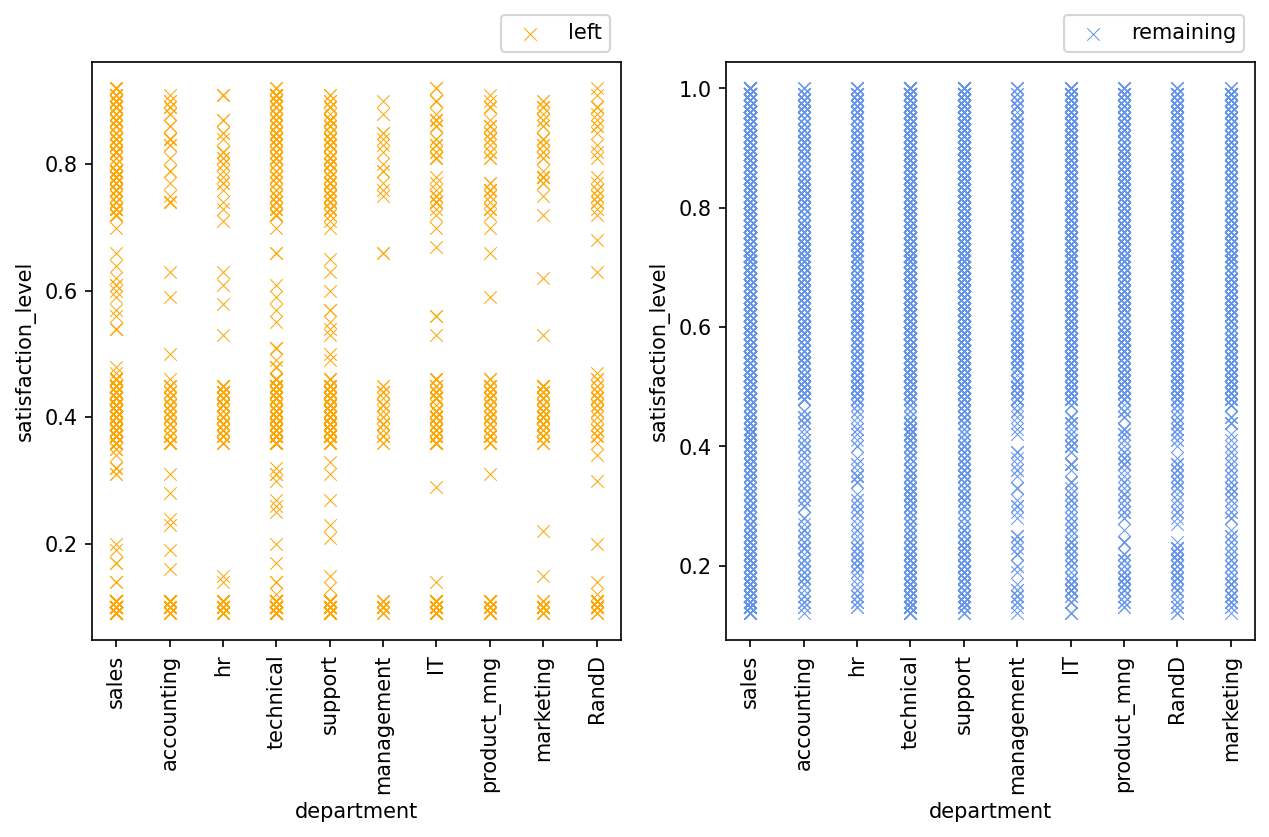

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df_left['department'], y=df_left['satisfaction_level'], marker='x', label = 'left', color='orange')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.scatterplot(x=df_remaining['department'], y=df_remaining['satisfaction_level'], marker='x', label = 'remaining', color='cornflowerblue')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))
plt.xticks(rotation = 90)
plt.show()

### Satisfaction vs Tenure
- Left employees fall into 2 main categories:
    + Dissatisfied employees with short tenures (2, 3)
    + Very satisfied employees with long tenures (>=5 )
    + 4 years employees need to investigate if possible.

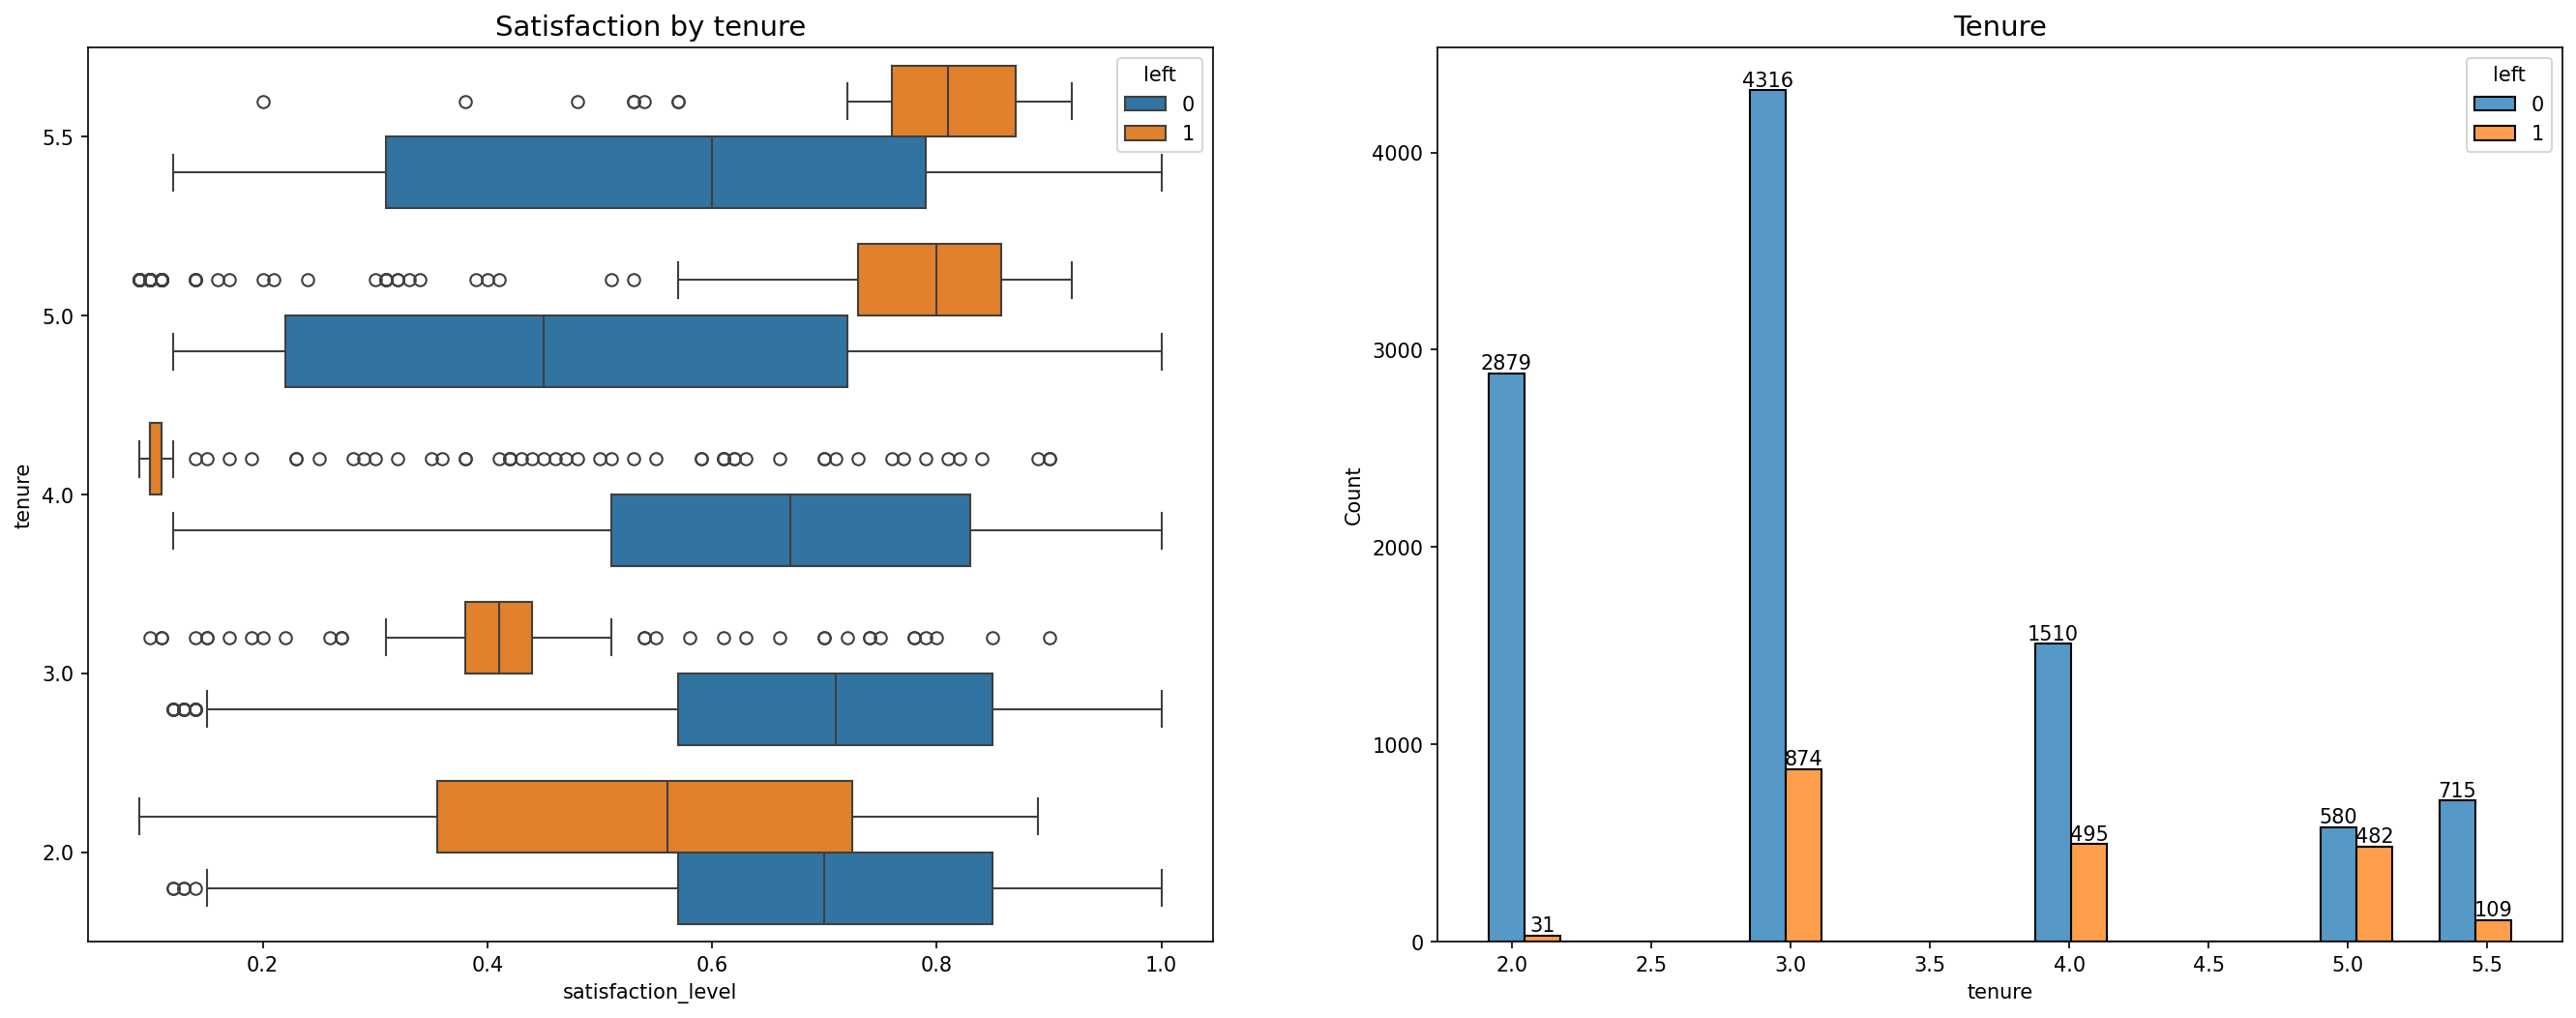

In [55]:
plt.figure(figsize=(22,8))

ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(data=df, x='satisfaction_level', y='tenure', hue='left',orient='h')
ax1.invert_yaxis()
plt.title('Satisfaction by tenure', fontsize='14')

ax2 = plt.subplot(1,2,2)
ax2 = sns.histplot(data=df, x='tenure', hue='left', multiple='dodge', shrink=3)
for container in ax2.containers:
    labels = [f'{int(value)}' if value != 0 else '' for value in container.datavalues]
    ax2.bar_label(container, labels=labels)
plt.title('Tenure', fontsize='14')

plt.show()

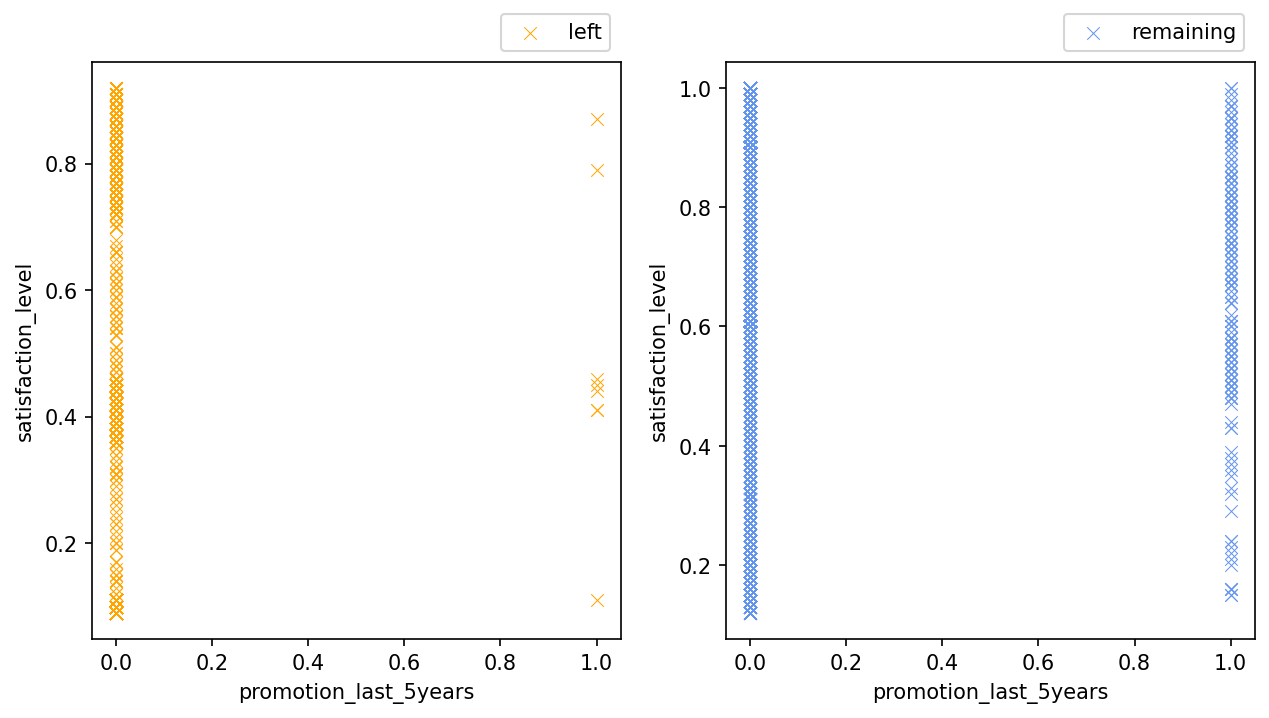

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df_left['promotion_last_5years'], y=df_left['satisfaction_level'], marker='x', label = 'left', color='orange')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

plt.subplot(1,2,2)
sns.scatterplot(x=df_remaining['promotion_last_5years'], y=df_remaining['satisfaction_level'], marker='x', label = 'remaining', color='cornflowerblue')
plt.legend(loc='upper right', bbox_to_anchor=(1,1.1))

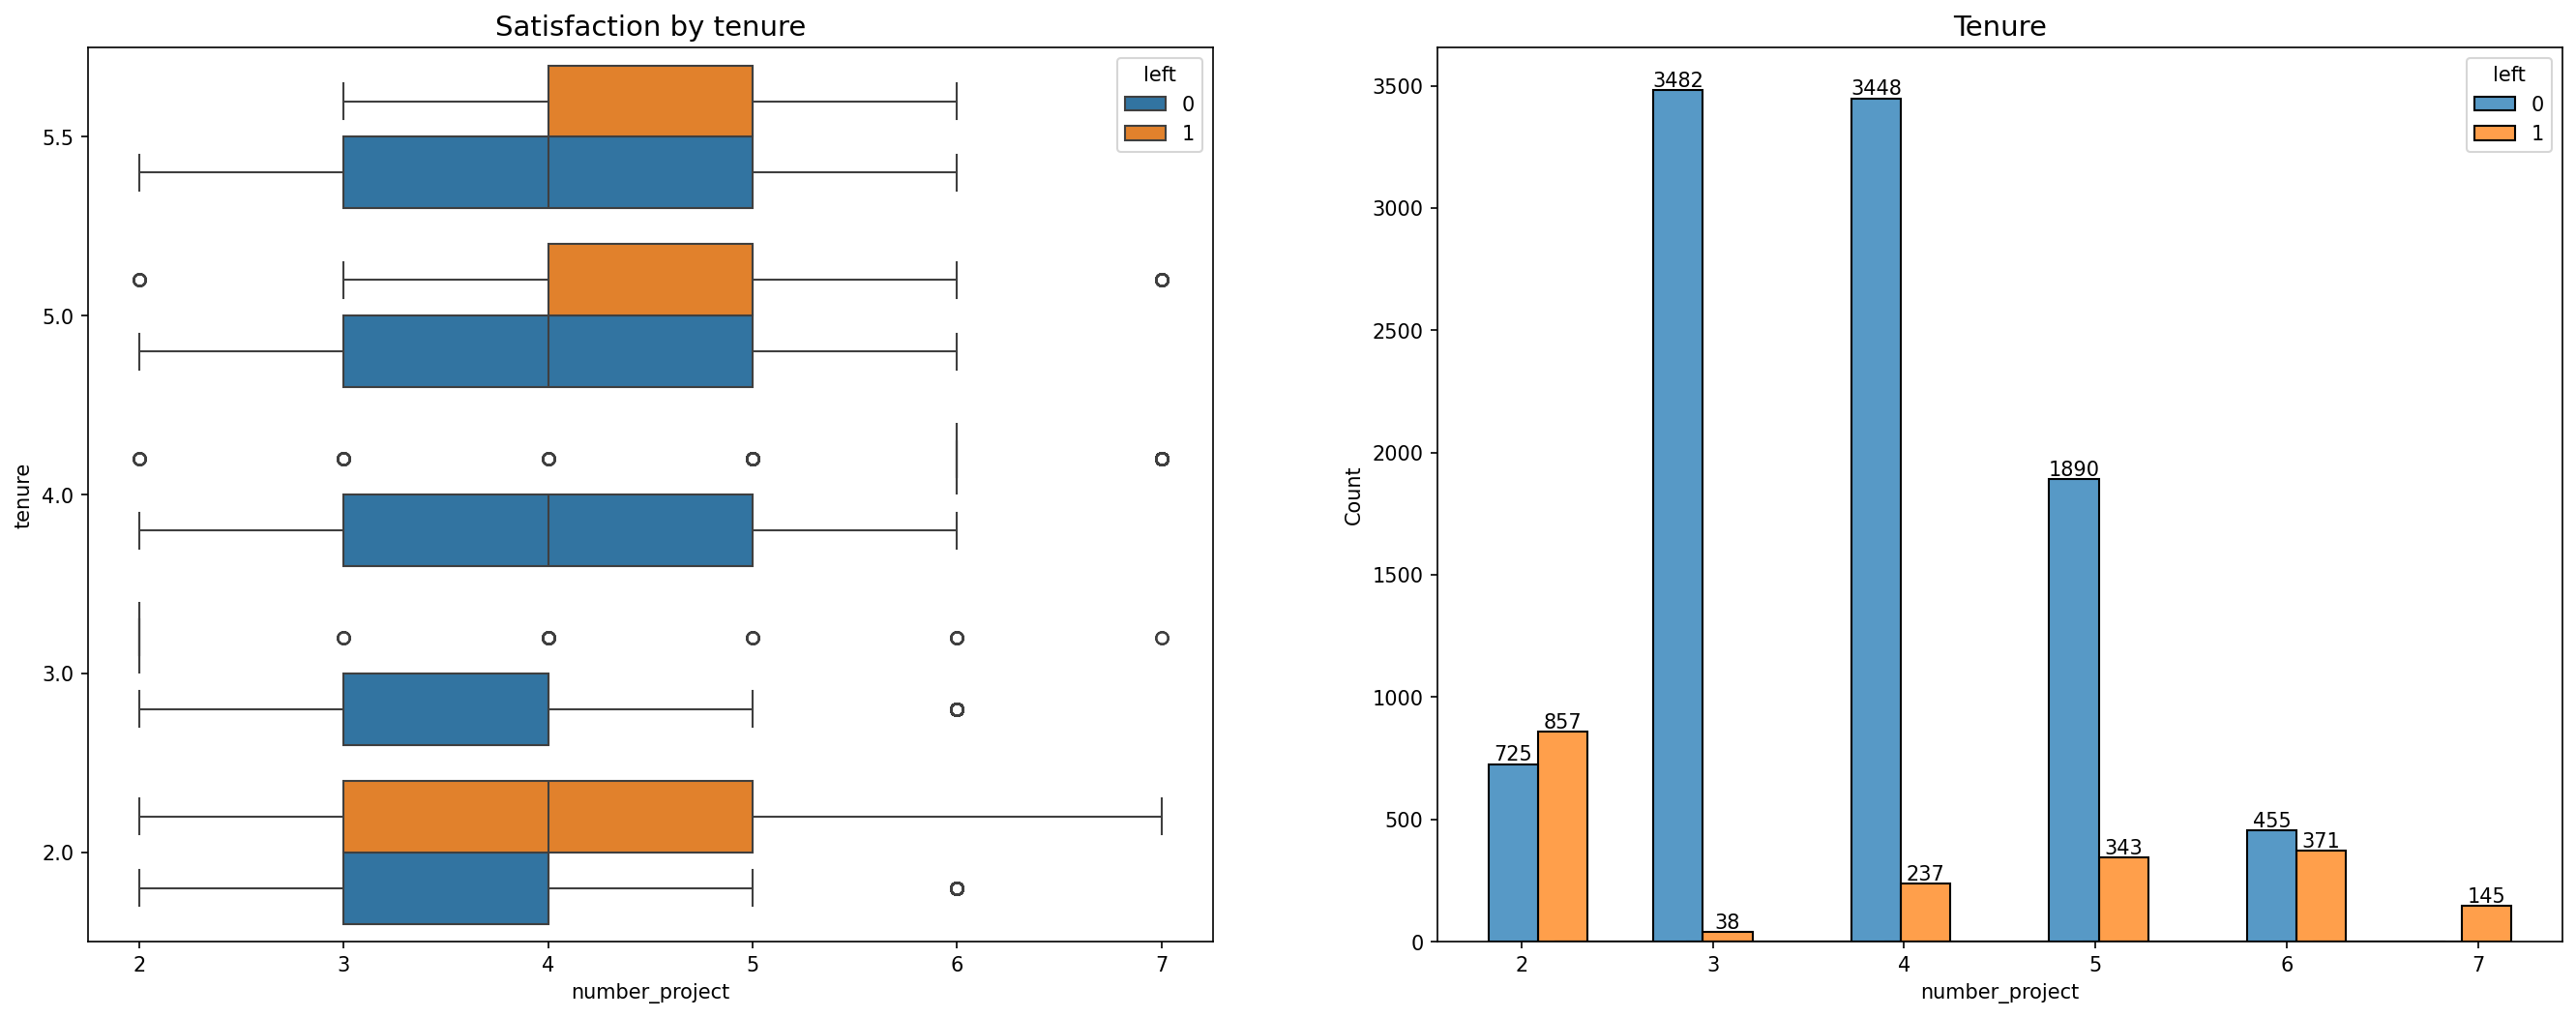

In [57]:
plt.figure(figsize=(22,8))

ax1 = plt.subplot(1,2,1)
ax1 = sns.boxplot(data=df, x='number_project', y='tenure', hue='left',orient='h')
ax1.invert_yaxis()
plt.title('Satisfaction by tenure', fontsize='14')

ax2 = plt.subplot(1,2,2)
ax2 = sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=3)
for container in ax2.containers:
    labels = [f'{int(value)}' if value != 0 else '' for value in container.datavalues]
    ax2.bar_label(container, labels=labels)
plt.title('Tenure', fontsize='14')

plt.show()

## Insights summary:
It appears that employees are leaving the company due to poor management.
- They worked longer hours than usual on many projects.
- No promotion despite their contributions.
- Only employees who have spent more than six year tend not to leave.

## Statistical testing

In [58]:
# # t-test, ANOVA, Chi squared --> xác định yếu tố (các cột khác) ảnh hưởng đến biến cuối
# import stastmodels
# from scipy import stats

# Feature Selection

In [59]:
df_num = df.copy()
df_num.drop(columns=['satisfaction_level','last_evaluation','left','department','salary'],inplace=True)

In [60]:
from sklearn.feature_selection import SelectFromModel

fs = SelectFromModel(LogisticRegression(), max_features=7)
df_reduced = fs.fit_transform(df_num, df['left'])

C:\Users\Hien Doan.000\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [61]:
fs.get_feature_names_out()

array(['work_accident', 'promotion_last_5years',
       'satisfaction_level_binned'], dtype=object)

# Preprocessing

## Data transformation

In [62]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  \
0    3.00              0     1                      0      sales     low   
1    5.50              0     1                      0      sales  medium   
2    4.00              0     1                      0      sales  medium   
3    5.00              0     1                      0      sales     low   
4    3.00              0     1                      0      sales     low   

  satisfaction_level_binned last_evaluation_binned  
0                      0.40                   0.60  
1                      0.80                   1.00  
2                      0.20                   1.00  
3                      0.80                   1.00  
4                      0.40                   0.60

In [63]:
df2 = df.copy()
df2.drop(columns=['satisfaction_level_binned','last_evaluation_binned'], inplace=True)
df2.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0    3.00              0     1                      0      sales     low  
1    5.50              0     1                      0      sales  medium  
2    4.00              0     1                      0      sales  medium  
3    5.00              0     1                      0      sales     low  
4    3.00              0     1                      0      sales     low

In [64]:
cat_cols = ['work_accident', 'promotion_last_5years', 'department', 'salary']
num_cols = [cols for cols in df2.columns if cols not in cat_cols + ['left']]

In [68]:
# Creating pipeline
cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent', missing_values=0)),
    ('encoder', OneHotEncoder())
])

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean', missing_values=0))
])

In [69]:
column_pipeline = ColumnTransformer(
    transformers=[
        ('categorical', cat_pipeline, cat_cols),
        ('numerical', num_pipeline, num_cols)
    ],
    remainder='passthrough'
)

preprocessing_pipeline = Pipeline(steps=[
    ('column_pipeline', column_pipeline)
])

In [70]:
preprocessing_pipeline

Pipeline(steps=[('column_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(missing_values=0,
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['work_accident',
                                                   'promotion_last_5years',
                                                   'department', 'salary']),
                                                 ('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(missing_values=0))]),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_monthly_hours',
                                                   'tenure'])]))])

## Train/ split test

In [71]:
X = df2.drop(['left'], axis=1)
y = df2['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 6999, 1: 1394})
Counter({0: 3001, 1: 597})


In [72]:
X_train = preprocessing_pipeline.fit_transform(X_train, y_train)
X_test = preprocessing_pipeline.transform(X_test)

## Oversampling

In [73]:
oversample = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

#count y
counter = Counter(y_train_smote)
print('After', counter)

After Counter({0: 6999, 1: 6999})


# Modeling

## Running multiple models with GridsearchCV at first glance

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin
class ModelPipeline(BaseEstimator):
  def __init__(self, model, model_param_grid, metrics, proba_metrics):
    self.model = model
    self.model_param_grid = model_param_grid
    self.grid_cv = GridSearchCV(model,param_grid=model_param_grid,cv=5)
    self.metrics = metrics
    self.proba_metrics = proba_metrics

  def fit(self, X, y):
    return self.grid_cv.fit(X, y)
  def predict(self, X):
    return self.grid_cv.predict(X)
  def predict_proba(self, X):
    return self.grid_cv.predict_proba(X)
  def score(self, X, y):
    return self.grid_cv.score(X, y)
  def get_best_params(self):
    return self.grid_cv.best_params_
  def get_best_model(self):
    return self.grid_cv.best_estimator_
  def evaluate(self, X, y):
    y_pred = self.predict(X)
    y_pred_proba = self.predict_proba(X)[:,1]
    res = {'model':self.model.__class__.__name__}
    res.update({metric.__name__: metric(y_true=y, y_pred=y_pred) for metric in self.metrics})
    res.update({metric.__name__: metric(y_true=y, y_score=y_pred_proba) for metric in self.proba_metrics})
    return res
  
def train_multi_model(models, params, X_train, y_train, X_train_smote, y_train_smote, X_test, y_test, metrics, proba_metrics):
  test_scores = []
  train_scores = []
  best_models = []
  for model, param in zip(models, params):
    model_pipeline = ModelPipeline(model, param, metrics=metrics, proba_metrics=proba_metrics)
    model_pipeline.fit(X_train_smote, y_train_smote)
    test_scores.append(model_pipeline.evaluate(X_test, y_test))
    train_scores.append(model_pipeline.evaluate(X_train, y_train))
    best_models.append(model_pipeline.get_best_model())
  return test_scores, train_scores, best_models

In [76]:
# List of models & params

models = [LogisticRegression(random_state=1),
          DecisionTreeClassifier(random_state=1),
          SVC(probability=True,random_state=1),
          RandomForestClassifier(random_state=1),
          GradientBoostingClassifier(random_state=1),
          KNeighborsClassifier(),
          XGBClassifier(random_state=1)]
params = [{'max_iter':[500,1000,1500],'C':[0.1,1,10]},
          {'max_depth': [3,5,7,10,12,15]},
          {'kernel':['poly','rbf']},
          {'max_depth': [3,5,7,10,12,15], 'n_estimators': [20,50,100,150,200]},
          {'n_estimators': [20,50,100], 'learning_rate': [0.01,0.1,0.3]},
          {'n_neighbors': [3,5,7]},
          {'n_estimators': [20,50,100], 'learning_rate': [0.01,0.1,0.3]}
          ]

In [89]:
test_scores,train_scores,best_models = train_multi_model(models, params, X_train, y_train, X_train_smote, y_train_smote, X_test, y_test, [accuracy_score, precision_score, recall_score, f1_score], [roc_auc_score])

In [91]:
pd.DataFrame(train_scores)

model  accuracy_score  precision_score  recall_score  \
0          LogisticRegression            0.79             0.43          0.88   
1      DecisionTreeClassifier            1.00             0.99          0.98   
2                         SVC            0.83             0.50          0.52   
3      RandomForestClassifier            0.99             0.99          0.97   
4  GradientBoostingClassifier            0.98             0.97          0.94   
5        KNeighborsClassifier            0.94             0.75          1.00   
6               XGBClassifier            1.00             1.00          0.98   

   f1_score  roc_auc_score  
0      0.58           0.84  
1      0.99           1.00  
2      0.51           0.61  
3      0.98           1.00  
4      0.95           0.99  
5      0.86           1.00  
6      0.99           1.00

In [90]:
pd.DataFrame(test_scores)

model  accuracy_score  precision_score  recall_score  \
0          LogisticRegression            0.80             0.45          0.88   
1      DecisionTreeClassifier            0.97             0.90          0.92   
2                         SVC            0.84             0.51          0.50   
3      RandomForestClassifier            0.98             0.96          0.93   
4  GradientBoostingClassifier            0.98             0.94          0.94   
5        KNeighborsClassifier            0.90             0.63          0.92   
6               XGBClassifier            0.98             0.96          0.93   

   f1_score  roc_auc_score  
0      0.59           0.85  
1      0.91           0.95  
2      0.50           0.59  
3      0.94           0.98  
4      0.94           0.98  
5      0.75           0.94  
6      0.94           0.98

In [92]:
best_models

[LogisticRegression(C=0.1, max_iter=500, random_state=1),
 DecisionTreeClassifier(max_depth=15, random_state=1),
 SVC(kernel='poly', probability=True, random_state=1),
 RandomForestClassifier(max_depth=15, n_estimators=200, random_state=1),
 GradientBoostingClassifier(learning_rate=0.3, random_state=1),
 KNeighborsClassifier(n_neighbors=3),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.3, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi

## Fine-tuning

### Logistic Regression

In [93]:
param_grid = {'C': [0.05, 0.07, 1],
              'max_iter': [100,250,500],
              'solver':['liblinear', 'lbfgs']}

lr = GridSearchCV(LogisticRegression(random_state=1,), param_grid, cv = 5)

model_grid = lr.fit(X_train_smote,y_train_smote)

In [94]:
# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'C': 0.05, 'max_iter': 100, 'solver': 'lbfgs'}
Best score: 0.8381196856020008


In [96]:
# predict on train set
y_pred = lr.predict(X_train_smote)

# Classification report
print(classification_report(y_pred,y_train_smote))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82      5998
           1       0.91      0.79      0.85      8000

    accuracy                           0.83     13998
   macro avg       0.83      0.84      0.83     13998
weighted avg       0.84      0.83      0.84     13998



Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      2388
           1       0.89      0.44      0.59      1210

    accuracy                           0.79      3598
   macro avg       0.83      0.70      0.72      3598
weighted avg       0.81      0.79      0.77      3598



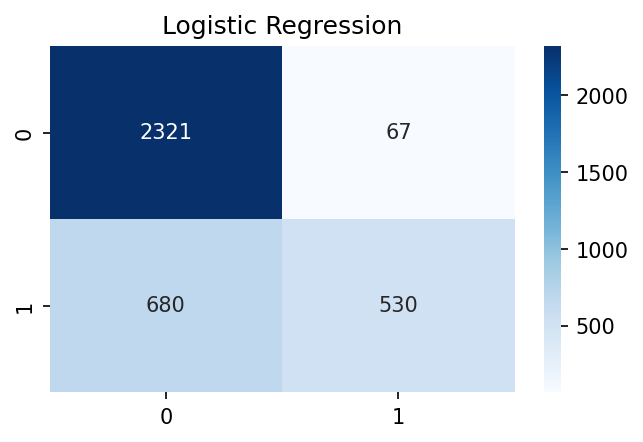

In [97]:
# predict on test set
y_pred = lr.predict(X_test)

# Confusion matrix & Classification report
plt.figure()
sns.heatmap(confusion_matrix(y_pred,y_test), cmap='Blues', annot=True, fmt='.0f')
plt.title(f'Logistic Regression')
print(f'Logistic Regression')
print(classification_report(y_pred,y_test))

#### Importance features

In [98]:
lr = LogisticRegression(C = 0.1, max_iter= 500, random_state=1)
lr.fit(X_train_smote,y_train_smote)

LogisticRegression(C=0.1, max_iter=500, random_state=1)

In [99]:
# Get feature names
cat_features = preprocessing_pipeline.named_steps['column_pipeline'].named_transformers_['categorical'].named_steps['encoder'].get_feature_names_out(cat_cols)
all_features = list(cat_features) + num_cols
X_train = pd.DataFrame(X_train, columns=all_features)
X_train.head()

work_accident_1  promotion_last_5years_1  department_IT  department_RandD  \
0             1.00                     1.00           0.00              0.00   
1             1.00                     1.00           0.00              0.00   
2             1.00                     1.00           0.00              0.00   
3             1.00                     1.00           0.00              0.00   
4             1.00                     1.00           0.00              0.00   

   department_accounting  department_hr  department_management  \
0                   0.00           0.00                   0.00   
1                   0.00           0.00                   0.00   
2                   0.00           0.00                   0.00   
3                   0.00           0.00                   0.00   
4                   0.00           0.00                   0.00   

   department_marketing  department_product_mng  department_sales  \
0                  0.00                    0.00              0.00   
1                  0.00                    0.00              0.00   
2                  0.00                    0.00              1.00   
3                  0.00                    0.00              1.00   
4                  0.00                    0.00              1.00   

   department_support  department_technical  salary_high  salary_low  \
0                0.00                  1.00         0.00        0.00   
1                0.00                  1.00         0.00        1.00   
2                0.00                  0.00         0.00        1.00   
3                0.00                  0.00         0.00        0.00   
4                0.00                  0.00         0.00        1.00   

   salary_medium  satisfaction_level  last_evaluation  number_project  \
0           1.00                0.13             0.72            3.00   
1           0.00                0.32             0.40            6.00   
2           0.00                0.58             0.86            4.00   
3           1.00                0.66             0.89            3.00   
4           0.00                0.72             0.96            3.00   

   average_monthly_hours  tenure  
0                 244.00    4.00  
1                 162.00    5.00  
2                 257.00    3.00  
3                 202.00    3.00  
4                 143.00    3.00

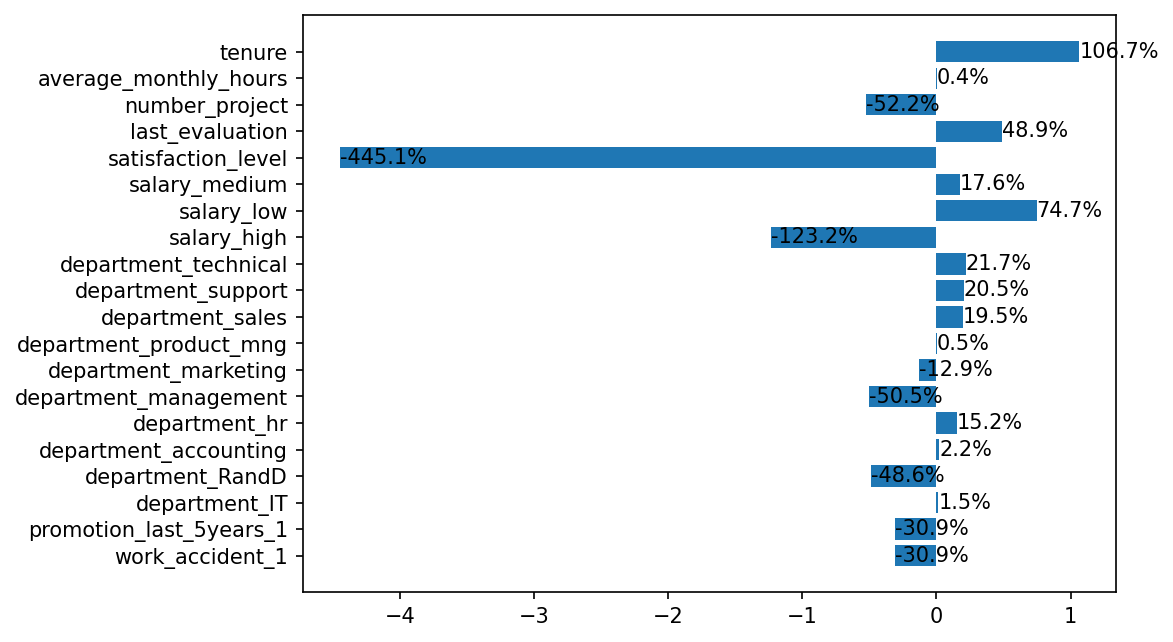

In [151]:
plt.figure(figsize=(7,5))
plt.barh(X_train.columns, lr.coef_[0])
for index,value in enumerate(lr.coef_[0]):
    plt.text(value,index,f'{value:.1%}', va = 'center' )

### Decision Tree

In [107]:
param_grid = {'max_depth': [10,15,20]}

dt = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv = 5)

model_grid = dt.fit(X_train_smote,y_train_smote)

In [108]:
# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'max_depth': 15}
Best score: 0.9753548461185118


In [109]:
# predict on train set
y_pred = dt.predict(X_train_smote)

# Classification report
print(classification_report(y_pred,y_train_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7017
           1       1.00      1.00      1.00      6981

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998



Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2984
           1       0.92      0.90      0.91       614

    accuracy                           0.97      3598
   macro avg       0.95      0.94      0.95      3598
weighted avg       0.97      0.97      0.97      3598



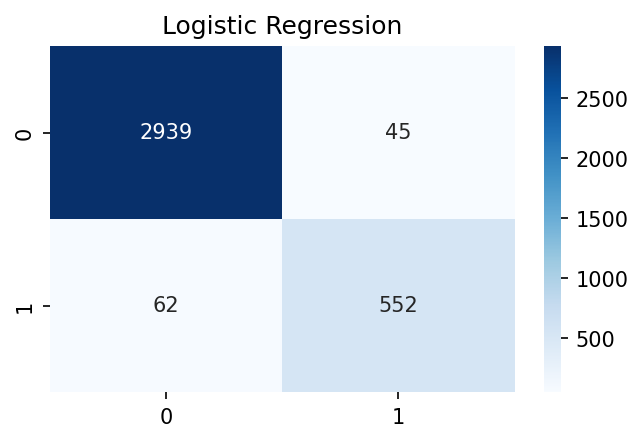

In [110]:
# predict on test set
y_pred = dt.predict(X_test)

# Confusion matrix & Classification report
plt.figure()
sns.heatmap(confusion_matrix(y_pred,y_test), cmap='Blues', annot=True, fmt='.0f')
plt.title(f'Decision Tree')
print(f'Decision Tree')
print(classification_report(y_pred,y_test))

roc_auc_score:  0.9510090717946056


Text(0.5, 1.0, 'ROC Curve')

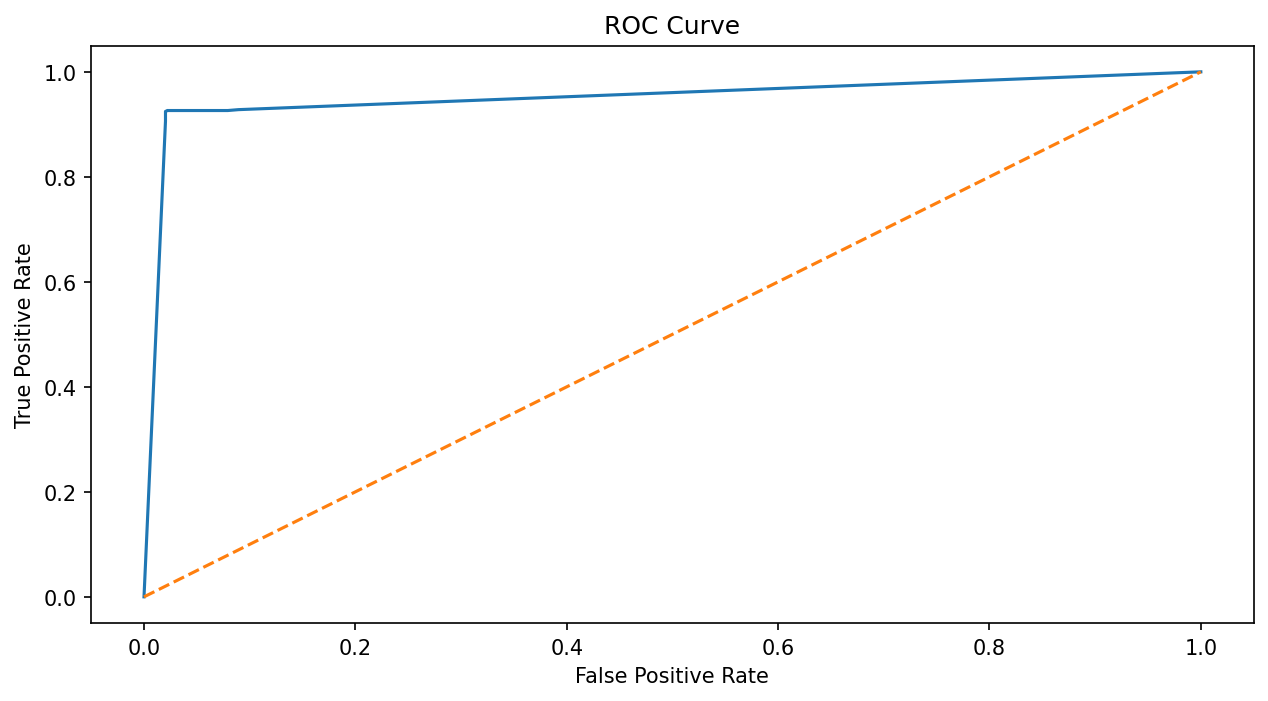

In [111]:
# AUC & ROC

y_pred_proba = dt.predict_proba(X_test)[:, 1]

fpr,tpr,thr=roc_curve(y_true=y_test,y_score=y_pred_proba)

print("roc_auc_score: ", roc_auc_score(y_true=y_test,y_score=y_pred_proba))

plt.figure(figsize=(10, 5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

#### Visualize Tree

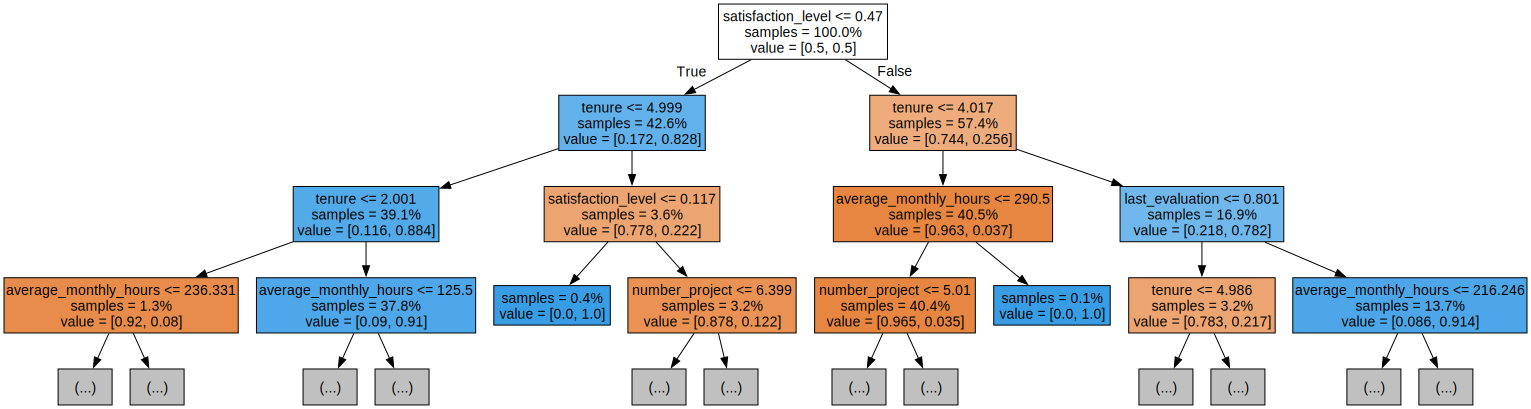

In [138]:
tree = dt
dot_data = export_graphviz(tree,
                            feature_names=X_train.columns,
                            filled=True,
                            max_depth=3,
                            impurity=False,
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

### Random Forest

In [144]:
param_grid = {'max_depth': [16,17,18,19], 'n_estimators': [350, 450, 500, 600],'min_samples_leaf': [2,3]}

rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv = 5)

model_grid = rf.fit(X_train_smote,y_train_smote)

In [145]:
# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'max_depth': 17, 'min_samples_leaf': 2, 'n_estimators': 450}
Best score: 0.9821415046189965


In [146]:
# predict on train set
y_pred = rf.predict(X_train_smote)

# Classification report
print(classification_report(y_pred,y_train_smote))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7073
           1       0.99      1.00      0.99      6925

    accuracy                           0.99     13998
   macro avg       0.99      0.99      0.99     13998
weighted avg       0.99      0.99      0.99     13998



Random Forest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3026
           1       0.92      0.97      0.94       572

    accuracy                           0.98      3598
   macro avg       0.96      0.98      0.97      3598
weighted avg       0.98      0.98      0.98      3598



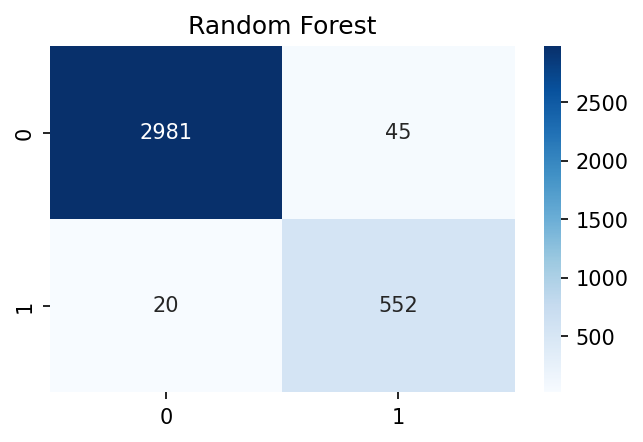

In [147]:
# predict on test set
y_pred = rf.predict(X_test)

# Confusion matrix & Classification report
plt.figure()
sns.heatmap(confusion_matrix(y_pred,y_test), cmap='Blues', annot=True, fmt='.0f')
plt.title(f'Random Forest')
print(f'Random Forest')
print(classification_report(y_pred,y_test))

roc_auc_score:  0.9841437555432389


Text(0.5, 1.0, 'ROC Curve')

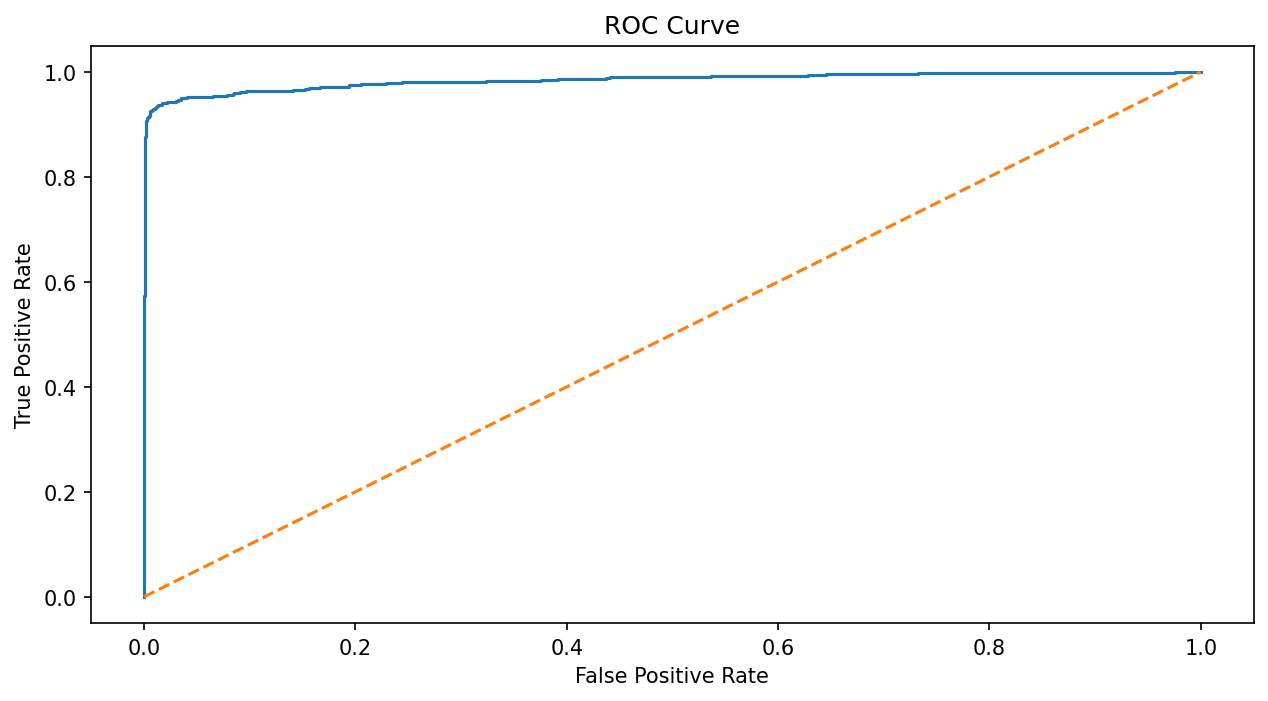

In [186]:
# AUC & ROC

y_pred_proba = rf.predict_proba(X_test)[:, 1]

fpr,tpr,thr=roc_curve(y_true=y_test,y_score=y_pred_proba)

print("roc_auc_score: ", roc_auc_score(y_true=y_test,y_score=y_pred_proba))

plt.figure(figsize=(10, 5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

#### Visualize Tree

In [170]:
tree_performance = pd.Series([tree.score(X_train_smote, y_train_smote) for tree in rf.estimators_])

In [175]:
# Find the tree with performance closest to the mean
mean_performance = tree_performance.mean()
best_tree_index = (tree_performance - mean_performance).abs().idxmin()

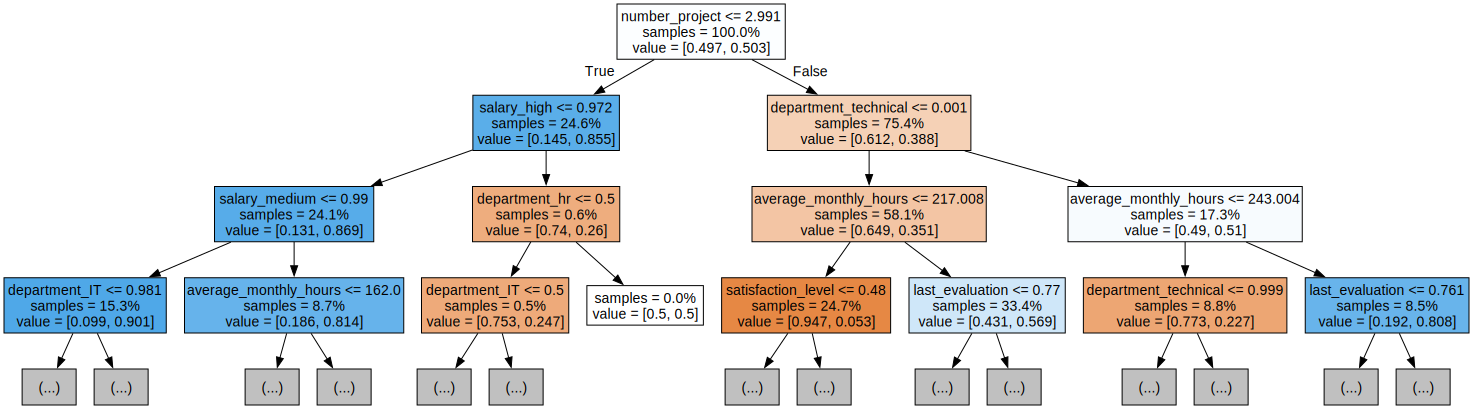

In [183]:
tree = rf.estimators_[best_tree_index]
dot_data = export_graphviz(tree,
                            feature_names=X_train.columns,
                            filled=True,
                            max_depth=3,
                            impurity=False,
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

### Gradient Boosting

In [184]:
param_grid = {'max_depth': [16,17,18], 'n_estimators': [100, 250, 500],'min_samples_leaf': [2,3], 'learning_rate': [0.2,0.3,0.4]}

gb = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv = 5)

model_grid = gb.fit(X_train_smote,y_train_smote)

In [185]:
# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'learning_rate': 0.4, 'max_depth': 16, 'min_samples_leaf': 3, 'n_estimators': 100}
Best score: 0.9871423212371765


In [187]:
# predict on train set
y_pred = gb.predict(X_train_smote)

# Classification report
print(classification_report(y_pred,y_train_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      6999

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998



Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3021
           1       0.93      0.97      0.95       577

    accuracy                           0.98      3598
   macro avg       0.96      0.98      0.97      3598
weighted avg       0.98      0.98      0.98      3598



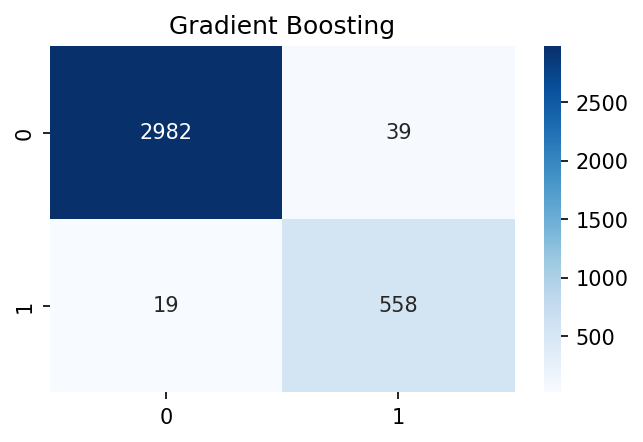

In [188]:
# predict on test set
y_pred = gb.predict(X_test)

# Confusion matrix & Classification report
plt.figure()
sns.heatmap(confusion_matrix(y_pred,y_test), cmap='Blues', annot=True, fmt='.0f')
plt.title(f'Gradient Boosting')
print(f'Gradient Boosting')
print(classification_report(y_pred,y_test))

roc_auc_score:  0.9856329297269418


Text(0.5, 1.0, 'ROC Curve')

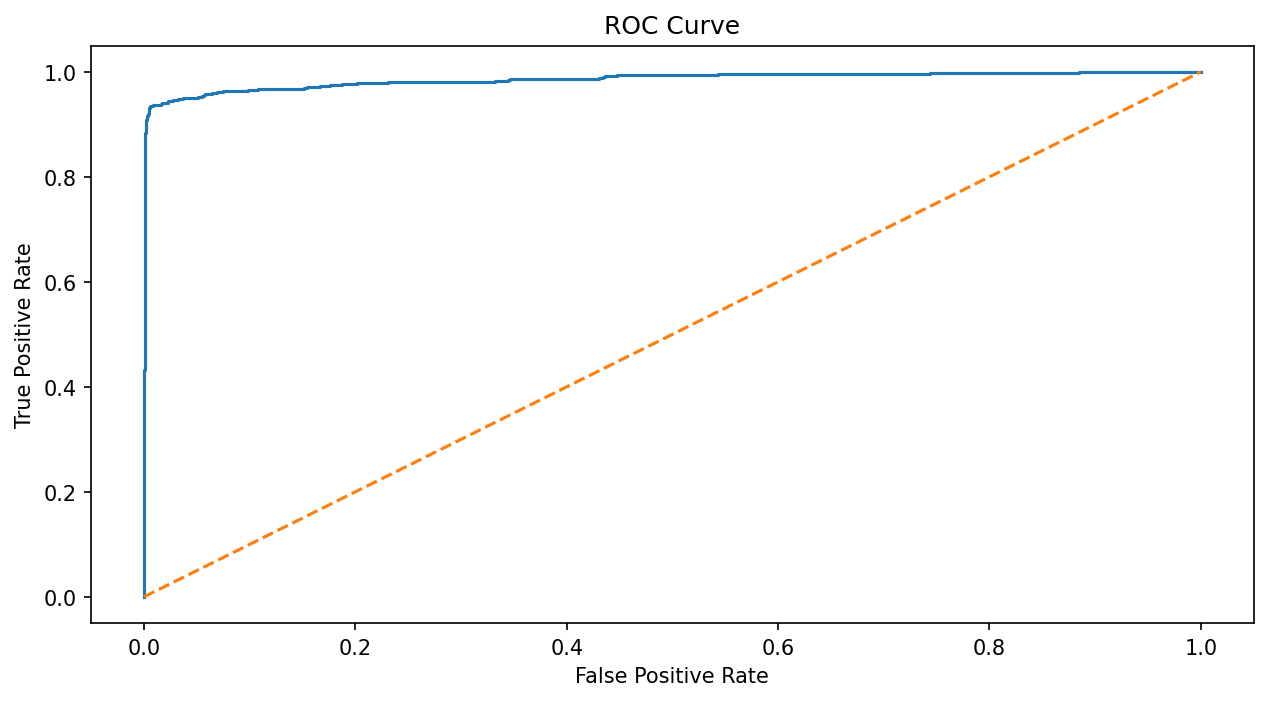

In [189]:
# AUC & ROC

y_pred_proba = gb.predict_proba(X_test)[:, 1]

fpr,tpr,thr=roc_curve(y_true=y_test,y_score=y_pred_proba)

print("roc_auc_score: ", roc_auc_score(y_true=y_test,y_score=y_pred_proba))

plt.figure(figsize=(10, 5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

#### Feature importance

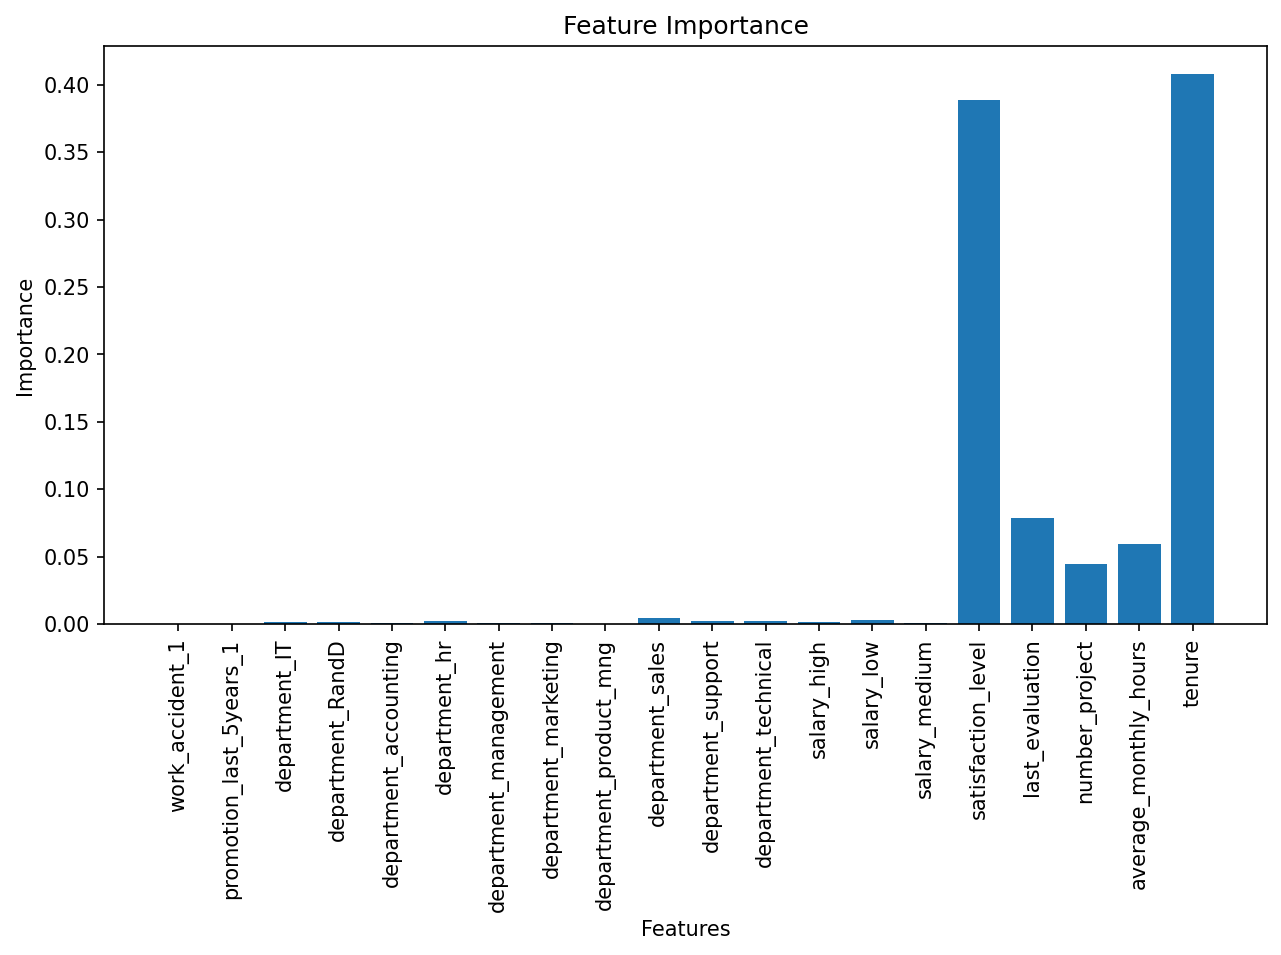

In [225]:
feature_importance = gb.feature_importances_
# Create a bar chart of feature importance
plt.figure(figsize=(10,5))
plt.bar(X_train.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation = 90)
plt.show()

#### Visualize Tree

In [194]:
tree_performance = pd.Series([tree[0].score(X_train_smote, y_train_smote) for tree in gb.estimators_])

In [195]:
# Find the tree with performance closest to the mean
mean_performance = tree_performance.mean()
best_tree_index = (tree_performance - mean_performance).abs().idxmin()

In [222]:
tree = gb.estimators_[best_tree_index][0]
dot_data = export_graphviz(tree,
                            feature_names=X_train.columns,
                            filled=True,
                            max_depth=4,
                            impurity=False,
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

# # Exporting graph
# graph.render("best_gradient_boosting_tree")
# graph.view()

'best_gradient_boosting_tree.pdf'

### XGB

In [208]:
param_grid = {'max_depth': [15,16,17], 'n_estimators': [105,110,115], 'learning_rate': [0.3,0.4,0.5]}

xgb = GridSearchCV(XGBClassifier(random_state=1), param_grid, cv = 5)

model_grid = xgb.fit(X_train_smote,y_train_smote)

In [211]:
# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'learning_rate': 0.4, 'max_depth': 16, 'n_estimators': 110}
Best score: 0.9854279079263002


In [212]:
# predict on train set
y_pred = xgb.predict(X_train_smote)

# Classification report
print(classification_report(y_pred,y_train_smote))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      6999

    accuracy                           1.00     13998
   macro avg       1.00      1.00      1.00     13998
weighted avg       1.00      1.00      1.00     13998



Extreme Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3021
           1       0.92      0.96      0.94       577

    accuracy                           0.98      3598
   macro avg       0.96      0.97      0.96      3598
weighted avg       0.98      0.98      0.98      3598



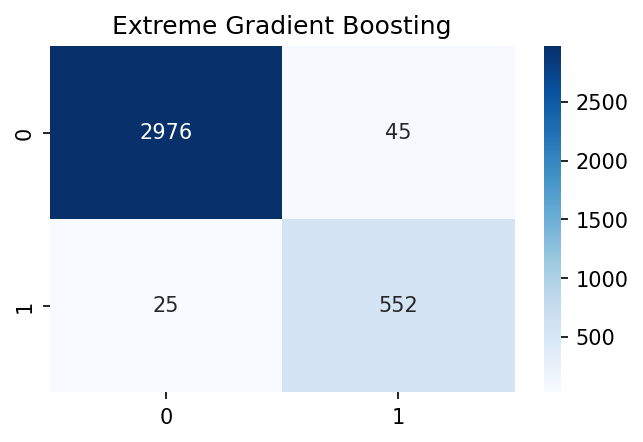

In [214]:
# predict on test set
y_pred = xgb.predict(X_test)

# Confusion matrix & Classification report
plt.figure()
sns.heatmap(confusion_matrix(y_pred,y_test), cmap='Blues', annot=True, fmt='.0f')
plt.title(f'Extreme Gradient Boosting')
print(f'Extreme Gradient Boosting')
print(classification_report(y_pred,y_test))

roc_auc_score:  0.983423727545871


Text(0.5, 1.0, 'ROC Curve')

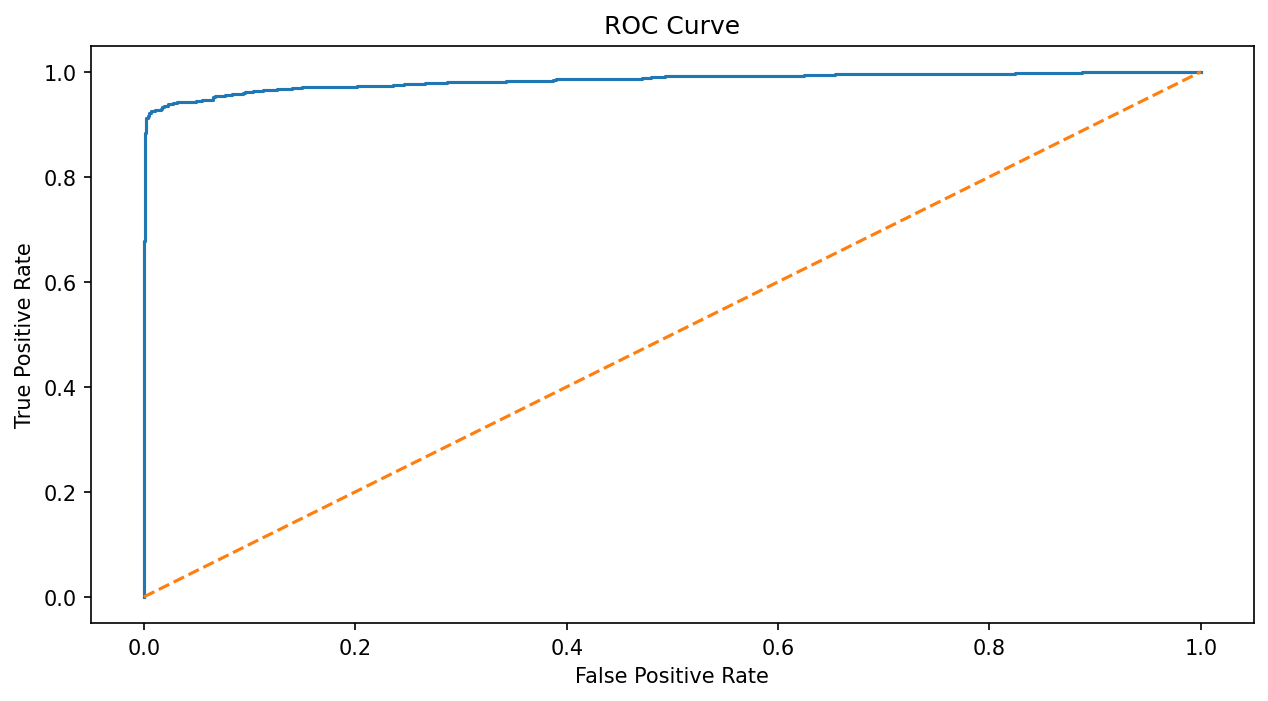

In [215]:
# AUC & ROC

y_pred_proba = xgb.predict_proba(X_test)[:, 1]

fpr,tpr,thr=roc_curve(y_true=y_test,y_score=y_pred_proba)

print("roc_auc_score: ", roc_auc_score(y_true=y_test,y_score=y_pred_proba))

plt.figure(figsize=(10, 5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

#### Visualize Tree

In [218]:
tree_performance = pd.Series([tree[0].score(X_train_smote, y_train_smote) for tree in xgb.estimators_])

In [219]:
# Find the tree with performance closest to the mean
mean_performance = tree_performance.mean()
best_tree_index = (tree_performance - mean_performance).abs().idxmin()

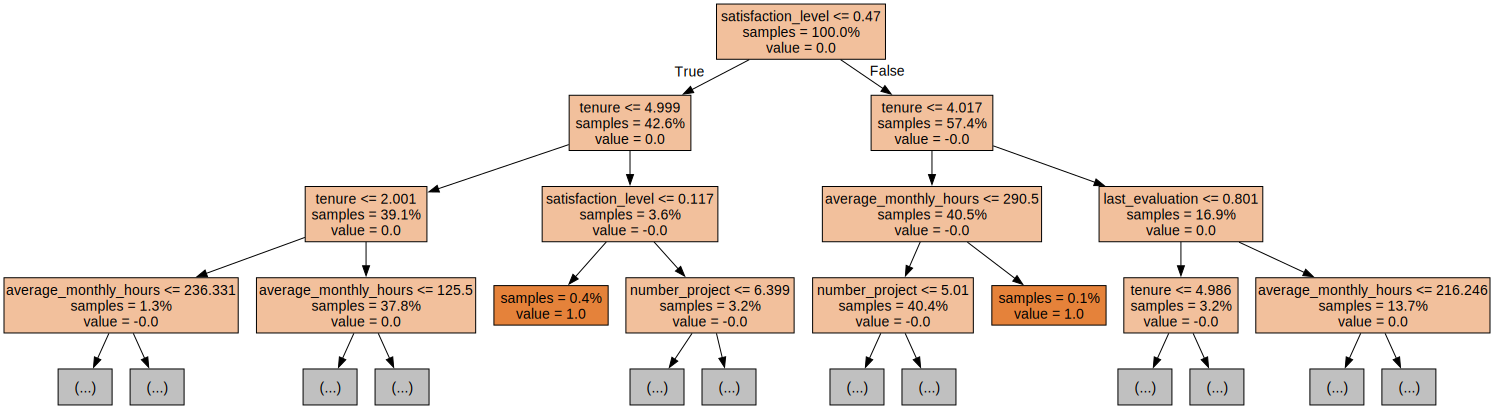

In [220]:
tree = xgb.estimators_[best_tree_index][0]
dot_data = export_graphviz(tree,
                            feature_names=X_train.columns,
                            filled=True,
                            max_depth=3,
                            impurity=False,
                            proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

## Summary of model results

- **Trained models**:
    + Logistic Regression
    + Decision Tree
    + Random Forest
    + Gradient Boosting
    + Extremly Gradient Boosting

- **Best model**:

After fine-tuning, The Gradient Boosting model delivered the best performance.
It achieved UAC of 98.6%, precision of 93%, recall of 97%, f1 of 95%, and accuracy of 98% on the test set.


- **Confusion matrix**:

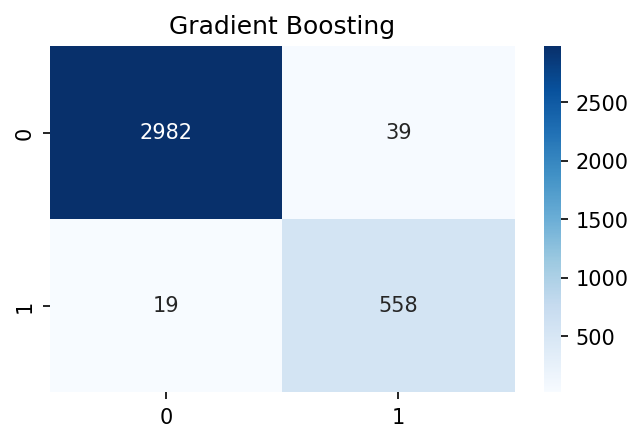




# Recommendations:

According to above EDA, employees are overworked. 

To retain employees, the following recommendations could be considered:

**Employee statisfaction:**
* Conduct regular surveys or stay interviews to measure and improve employee satisfaction levels. Identify the sources of dissatisfaction and address them accordingly. For example, provide feedback, recognition, or rewards for good performance; offer training, coaching, or mentoring for skill development; create a positive and supportive work environment; etc.

* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.

* Conduct further investigation about why four-year tenured employees are so dissatisfied. 

**Workload Management and Well-being:**
* Monitor and regulate the average monthly hours of employees. Ensure that they have a reasonable and balanced workload that matches their capabilities and preferences. Avoid excessive or insufficient working hours that may affect their health, well-being, or productivity. Promote a healthy work-life balance and respect their personal time and space.

* Avoid overloading or underloading employees with projects, which may cause stress, boredom, or frustration. Provide clear expectations, guidance, and support for each project. It apparents that handling three projects is ideal. 

**Retention and Regcognition:**
* Long tenure Regcognition: Recognize and reward employees who have long tenure, as they may have valuable skills, experience, and knowledge that benefit the company. You can offer them bonuses, raises, promotions, or other forms of recognition that show your appreciation for their loyalty.

* Short tenure Regcognition: Provide opportunities for employees who have short tenure, as they may be looking for new challenges, learning, and growth. You can offer them mentoring, coaching, training, or other forms of development that help them improve their performance and potential.
